<a href="https://colab.research.google.com/github/diegoarz02/Regresion-logistica-conversion-de-leads/blob/main/Regresion_Logistica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análisis de Conversión de Leads para la Escuela Online de Negocios
**By: Diego Araujo**
#### 1. Introducción
La Escuela Online de Negocios (EON) es una institución educativa líder en programas de negocios en línea, destacada por su enfoque innovador y práctico. Sin embargo, enfrenta un desafío importante: **una baja tasa de conversión de leads**, a pesar del alto interés en sus cursos.  
Para abordar este problema, aplicaremos un **modelo de Regresión Logística** con el objetivo de mejorar la conversión de leads y optimizar las estrategias de marketing y ventas.

#### 2. Objetivos del Proyecto
Este análisis tiene los siguientes objetivos clave:
- **Desarrollar un modelo de regresión logística** que permita evaluar la probabilidad de conversión de cada lead.
- **Asignar un puntaje de 0 a 100** a cada lead, reflejando su probabilidad de conversión.
- **Identificar 'Hot Leads'**, es decir, aquellos prospectos con alta probabilidad de conversión, para enfocar mejor los esfuerzos de marketing y ventas.

#### 3. Datos Utilizados
Para este análisis, trabajaremos con diversas variables que describen el comportamiento e interacción de los leads.  
A continuación, se presentan algunas variables clave del conjunto de datos:

- **Lead Origin**: Origen del lead (e.g., referencia, redes sociales, búsqueda orgánica).
- **Lead Source**: Fuente específica por la que llegó el lead (e.g., Google, Facebook, Email).
- **Do Not Email / Do Not Call**: Indicadores de si el lead ha solicitado no recibir emails o llamadas.
- **Total Visits**: Número total de visitas al sitio web.
- **Total Time Spent on Website**: Tiempo total que el lead ha pasado en la web.
- **Page Views Per Visit**: Promedio de páginas vistas por visita.
- **Last Activity**: Última actividad realizada por el lead (e.g., apertura de correo, clic en enlace).
- **Specialization**: Especialización académica de interés del lead.
- **Current Occupation**: Ocupación actual del lead (e.g., estudiante, profesional).
- **Tags**: Etiquetas asignadas al lead según su comportamiento.
- **City**: Ciudad del lead.
- **Lead Profile**: Perfil categorizado del lead.
- **Variable Objetivo ("Converted")**: Indica si el lead se convirtió en cliente (1) o no (0).

#### 4. Limpieza y Preparación de Datos
Antes de construir nuestro modelo, es fundamental realizar una limpieza y preparación adecuada de los datos:
- **Manejo de valores faltantes** en variables clave.
- **Transformación de variables categóricas** en formatos numéricos.
- **Selección de variables relevantes** para mejorar la capacidad predictiva del modelo.

#### 5. Creación del Modelo de Regresión Logística
La regresión logística es un método estadístico que nos permite modelar la probabilidad de un evento binario, en este caso, la conversión de un lead.  
Los pasos principales incluyen:
- **División del conjunto de datos** en entrenamiento y prueba.
- **Construcción del modelo** ajustando los coeficientes para maximizar la precisión.
- **Evaluación del modelo** mediante métricas como la matriz de confusión, precisión, sensibilidad y la curva ROC.

#### 6. Evaluación y Testing del Modelo
Para garantizar la calidad del modelo, utilizaremos:
- **Matriz de confusión** para analizar aciertos y errores en la clasificación de leads.
- **Curva ROC y AUC** para evaluar la capacidad del modelo de distinguir entre leads convertidos y no convertidos.

#### 7. Implementación del Lead Score
Una vez validado el modelo, lo aplicaremos para calcular un **Lead Score**, un puntaje entre 0 y 100 que refleje la probabilidad de conversión.  
Esto permitirá:
- **Priorizar Hot Leads** y asignar recursos de manera estratégica.
- **Optimizar campañas de marketing**, enfocando esfuerzos en los leads con mayor probabilidad de conversión.
- **Personalizar la comunicación y promociones**, aumentando la efectividad del acercamiento.


In [ ]:
# Librerias que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from google.colab import drive
#drive.mount('/content/drive')

### Preprocesamiento y Limpieza de Datos

Antes de construir nuestro modelo de Regresión Logística, es fundamental preparar los datos
para garantizar que la información sea precisa y útil. El preprocesamiento de datos nos
permite manejar inconsistencias y mejorar la calidad del dataset, optimizando así el
rendimiento del modelo.

En esta etapa, realizaremos las siguientes tareas clave:

1️⃣ **Manejo de valores faltantes** 🛠️  
   Algunas variables contienen datos ausentes que pueden afectar la precisión del modelo.
   Aplicaremos estrategias como la imputación de valores o eliminación de registros
   según la relevancia de la variable.

2️⃣ **Conversión de variables categóricas** 🔄  
   Muchas columnas contienen datos en formato de texto (por ejemplo, "Sí"/"No" o nombres de ciudades).  
   Para que la regresión logística pueda utilizarlas, transformaremos estas variables en valores
   numéricos mediante técnicas como **one-hot encoding** o **label encoding**.

3️⃣ **Eliminación de duplicados** 🧹  
   Si existen registros repetidos, los identificaremos y eliminaremos para evitar sesgos en el análisis.

4️⃣ **Normalización y escalado** 📏  
   Algunas variables numéricas tienen rangos muy diferentes (por ejemplo, "Total Time Spent on Website"
   vs. "Page Views Per Visit"). Para mejorar la estabilidad del modelo, aplicaremos técnicas de escalado
   como **Min-Max Scaling o Standardization**.

5️⃣ **Selección de variables relevantes** 🎯  
   No todas las variables aportan valor al modelo. Realizaremos un análisis exploratorio para identificar
   las más importantes y descartaremos aquellas que no contribuyen significativamente a la predicción.



In [ ]:
#Importamos nuestra data
ruta_csv = "/content/drive/MyDrive/Codigos Python colab/EON.csv"
df = pd.read_csv(ruta_csv)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Podemos visualizar que tenemos 2 variables que podrían funcionar como 'ID': Prospect ID y Lead Number. Botemos la más compleja Prospect ID
df.drop(columns= 'Prospect ID', axis = 1, inplace = True)
df.set_index('Lead Number', inplace = True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Ahora pasamos a examinar los datos para ver su tipo y si hay datos faltantes
# Notamos que hay 9240 registros, pero de las 35 variables, 17 tienen variables null
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

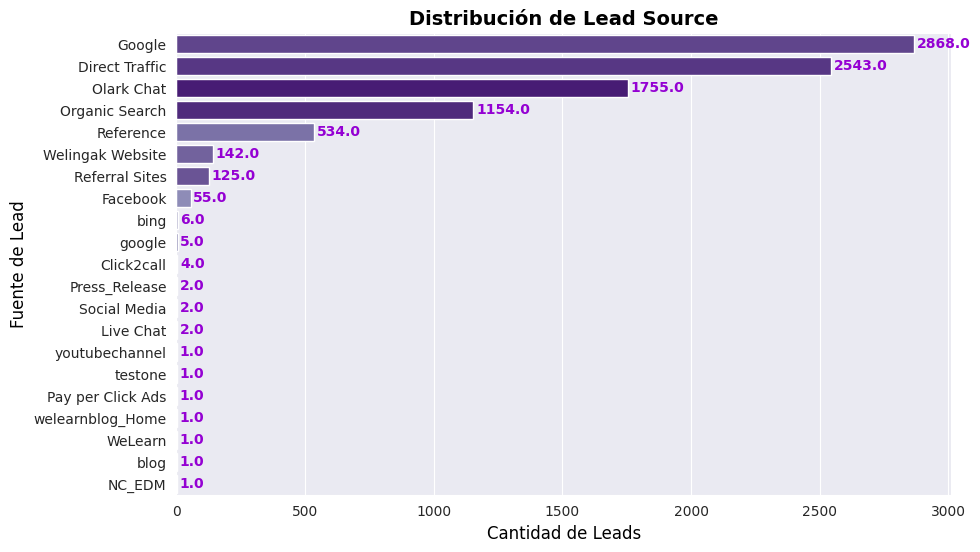

In [ ]:
# Empezaremos haciendo un grafico de barras para Lead Source y ver donde estan las fuentes de tráfico
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Lead Source',
    data=df,
    order=df['Lead Source'].value_counts().index,
    hue='Lead Source',
    palette="Purples_r",
    legend=False
)
plt.title("Distribución de Lead Source", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Leads", fontsize=12, color='black')
plt.ylabel("Fuente de Lead", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

🔍 **Manejo de Valores Faltantes en 'Lead Source'**  

En el análisis exploratorio, podríamos haber encontrado una fuente de tráfico dominante, lo que justificaría imputar los valores faltantes con la más frecuente (moda). Esta estrategia se basa en la suposición de que un nuevo lead probablemente provenga de la fuente más común.  

📌 **Sin embargo, en este caso no hay una fuente claramente dominante.**  
Para evitar sesgos en el modelo, en lugar de usar la moda, asignaremos el valor **"Desconocido"** a los datos faltantes. Esto nos permite mantener la información sin distorsionar la distribución original de las fuentes de tráfico.  

In [ ]:
df['Lead Source'] =df['Lead Source'].fillna('Desconocido')

📌 **Corrección de Tipo de Datos: 'Do Not Email', 'Do Not Call' y 'Converted'**  

Antes de continuar con el análisis, es importante asegurarnos de que estas variables tengan el tipo de dato correcto:  

🔹 **Do Not Email**:  
   - Variable indicadora seleccionada por el cliente.  
   - Indica si un usuario ha optado por *no* recibir correos electrónicos sobre el curso.  
   - Se convertirá a un tipo **booleano (0 = Sí recibe, 1 = No recibe)** para facilitar su uso en el modelo.  

🔹 **Do Not Call**:  
   - Similar a 'Do Not Email', esta variable indica si un cliente ha optado por *no* recibir llamadas.  
   - También se transformará a **booleano (0 = Sí recibe, 1 = No recibe)**.  

🔹 **Converted** (*Variable Objetivo*):  
   - Indica si un lead ha sido convertido exitosamente en estudiante (1) o no (0).  
   - Ya está en formato numérico, por lo que no requiere transformación.  

✅ *Estas conversiones son esenciales para que el modelo interprete correctamente la información y pueda hacer predicciones precisas.*








In [ ]:
# Convirtamos las variables a booleanos. Como haremos lo mismo con las tres, hagamos un lazo for
mapeo_binario = {'Yes': 1, 'No': 0}

for col in ['Do Not Email', 'Do Not Call', 'Converted']:
    df[col] = df[col].replace(mapeo_binario).astype(bool)



<ipython-input-383-ff4094352a4d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-383-ff4094352a4d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)


📌 **Manejo de Valores Nulos: 'TotalVisits' y 'Page Views Per Visit'**  

🔹 **TotalVisits**: Número total de visitas realizadas por el cliente en el sitio web.  
🔹 **Page Views Per Visit**: Cantidad de páginas vistas por el cliente durante sus visitas.  

🔍 *Antes de imputar los valores nulos, evaluaremos la distribución de estas variables para seleccionar el mejor método.*  

In [ ]:
# Examinamos la distribución de Total Visits
df['TotalVisits'].describe()

,TotalVisits
count,9103.000000
mean,3.445238
std,4.854853
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,251.000000


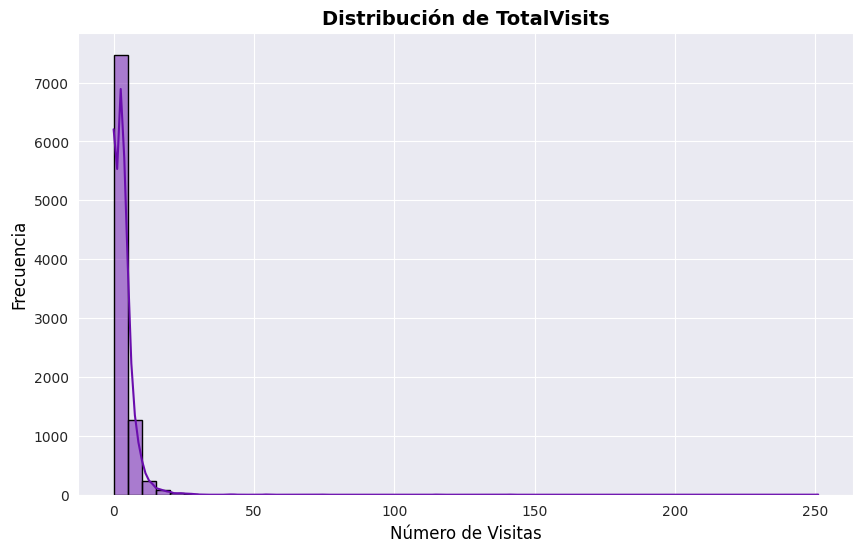

In [ ]:
# Ahora realizaremos un Histograma de la  Distribucion
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(x='TotalVisits', data=df, bins=50, kde=True, color="#6a0dad", edgecolor="black")
plt.title("Distribución de TotalVisits", fontsize=14, fontweight="bold", color="black")
plt.xlabel("Número de Visitas", fontsize=12, color="black")
plt.ylabel("Frecuencia", fontsize=12, color="black")
plt.show()

📊 Interpretación de la distribución de TotalVisits:
- La distribución es altamente sesgada a la derecha, indicando que la mayoría de los usuarios realizan pocas visitas al sitio web.
- Existen algunos valores extremos (outliers) con un número elevado de visitas, pero representan una minoría.
- Esto sugiere que la mayoría de los leads interactúan poco con la plataforma antes de decidirse, lo que puede influir en la estrategia de conversión.
"""

In [ ]:
# Examinemos la distribución de 'Page Views Per Visit'
df['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9103.000000
mean,2.362820
std,2.161418
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,55.000000


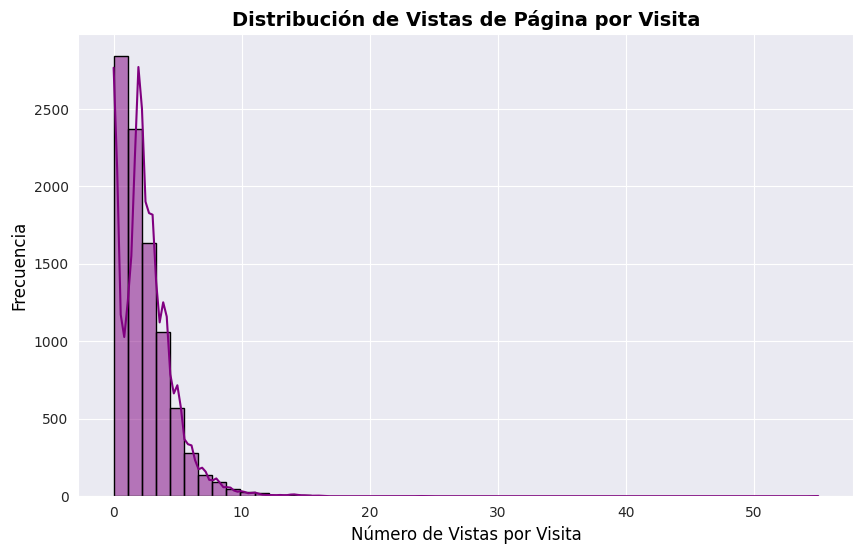

In [ ]:
# Realizamos otro histograma de la distribución
# Configuración del estilo
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.histplot(x='Page Views Per Visit', data=df, bins=50,kde=True, color='purple', edgecolor='black')
ax.set_title("Distribución de Vistas de Página por Visita", fontsize=14, color='black', fontweight='bold')
ax.set_xlabel("Número de Vistas por Visita", fontsize=12, color='black')
ax.set_ylabel("Frecuencia", fontsize=12, color='black')
plt.show()

📌 Concepto clave: Imputación de valores faltantes según la distribución de los datos

Cuando una variable tiene una distribución severamente sesgada, la mejor estrategia para
imputar valores faltantes es usar la mediana.

✅ ¿Por qué?
- La mediana no se ve afectada por valores atípicos o extremos, lo que la hace más robusta  
  para datos con sesgo.
- Proporciona una mejor estimación del "centro" cuando la distribución está sesgada.

📊 ¿Qué pasa si la distribución es normal (simétrica)?
- En ese caso, podríamos usar la media en lugar de la mediana.
- La media es una buena medida de tendencia central cuando los datos no están sesgados,  
  ya que en una distribución normal, la media y la mediana son prácticamente iguales.

🔍 Resumen
- Distribución sesgada → Usar mediana 🏆
- Distribución normal → Usar media ✅

In [ ]:
# Imputamos la mediana para los valores faltantes de TotalVisits
df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())
# Imputamos la mediana para los valores faltantes de 'Page Views Per Visit'
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

📌 Manejo de Valores Nulos: Última Actividad (Last Activity)

🔹 Descripción:
La variable 'Last Activity' representa la última acción realizada por el cliente en la plataforma.
Esto puede incluir:
- Apertura de un correo electrónico 📧
- Interacción en el chat de Olark 💬
- Clic en un enlace 🔗
- Entre otras actividades.

🔍 Estrategia para manejar valores nulos:
Para imputar los valores faltantes de esta variable, es fundamental analizar su distribución.
Si existe una actividad claramente predominante, podríamos reemplazar los valores nulos con la
categoría más frecuente (moda).

Sin embargo, si la distribución es variada, podríamos agrupar ciertas categorías similares o
asignar un valor como "Desconocido" para evitar sesgos en el análisis.

🎯 Objetivo:
Asegurar que los valores faltantes se manejen adecuadamente sin distorsionar la información
relevante para la segmentación y modelado.

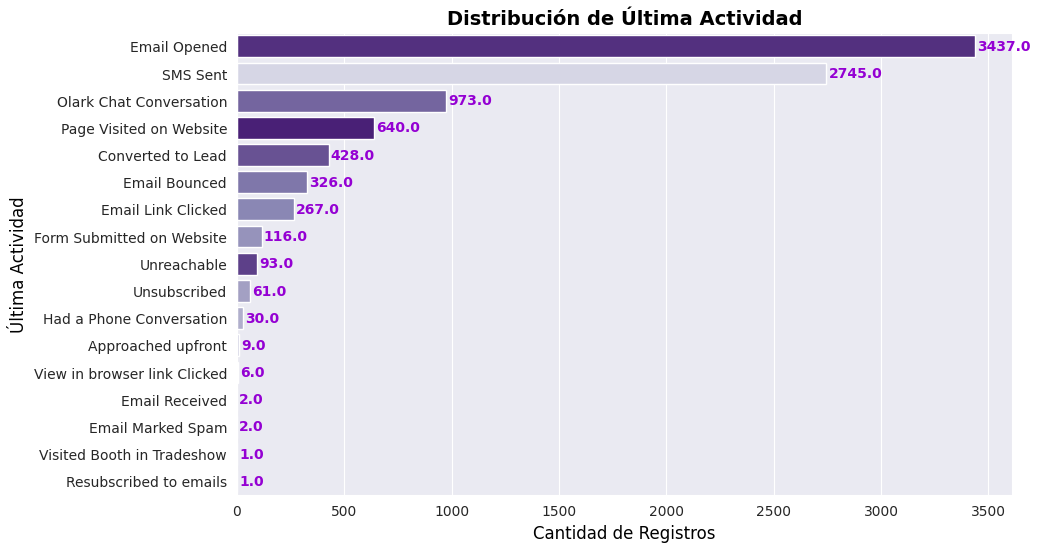

In [ ]:
# Gráfico de Distribución de Last Activity
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Last Activity',
    data=df,
    order=df['Last Activity'].value_counts().index,
    hue='Last Activity',
    palette="Purples_r",
    legend=False
)
plt.title("Distribución de Última Actividad", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Registros", fontsize=12, color='black')
plt.ylabel("Última Actividad", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 10, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

📌 **Preprocesamiento de Datos: Una Clave en Ciencia de Datos**

El preprocesamiento de datos es una etapa crucial en cualquier proyecto de ciencia de datos. No solo implica limpiar los datos, sino que también brinda la oportunidad de comprender su estructura, patrones y posibles problemas.

🎯 **¿Por qué visualizar los datos?**  
La visualización nos permite detectar tendencias, valores atípicos y distribuciones que de otra manera pasarían desapercibidos. Un gráfico de la distribución de 'Última Actividad' puede revelar patrones de comportamiento, preferencias y la efectividad de los canales de comunicación utilizados.

📊 **Interpretación de la Distribución de 'Última Actividad'**  
Si ninguna actividad específica domina sobre las demás (por ejemplo, con una frecuencia superior al 80-95%), significa que los clientes interactúan de diversas formas y no hay una tendencia única clara.

🔍 **Manejo de Valores Nulos en 'Última Actividad'**  
Dado que no existe una actividad predominante, una estrategia efectiva es asignar el valor "Desconocido" a los registros faltantes. Esto evita introducir un sesgo y conserva la integridad de los datos, registrando la ausencia de información en lugar de hacer suposiciones erróneas.

📢 **Conclusión**  
Este enfoque no solo es útil para gestionar datos faltantes, sino que también ayuda a reconocer las limitaciones de nuestros datos. Puede motivar investigaciones futuras para mejorar la recopilación de información y optimizar la toma de decisiones basadas en datos.

In [ ]:
df['Last Activity'] = df['Last Activity'].fillna('Desconocido')

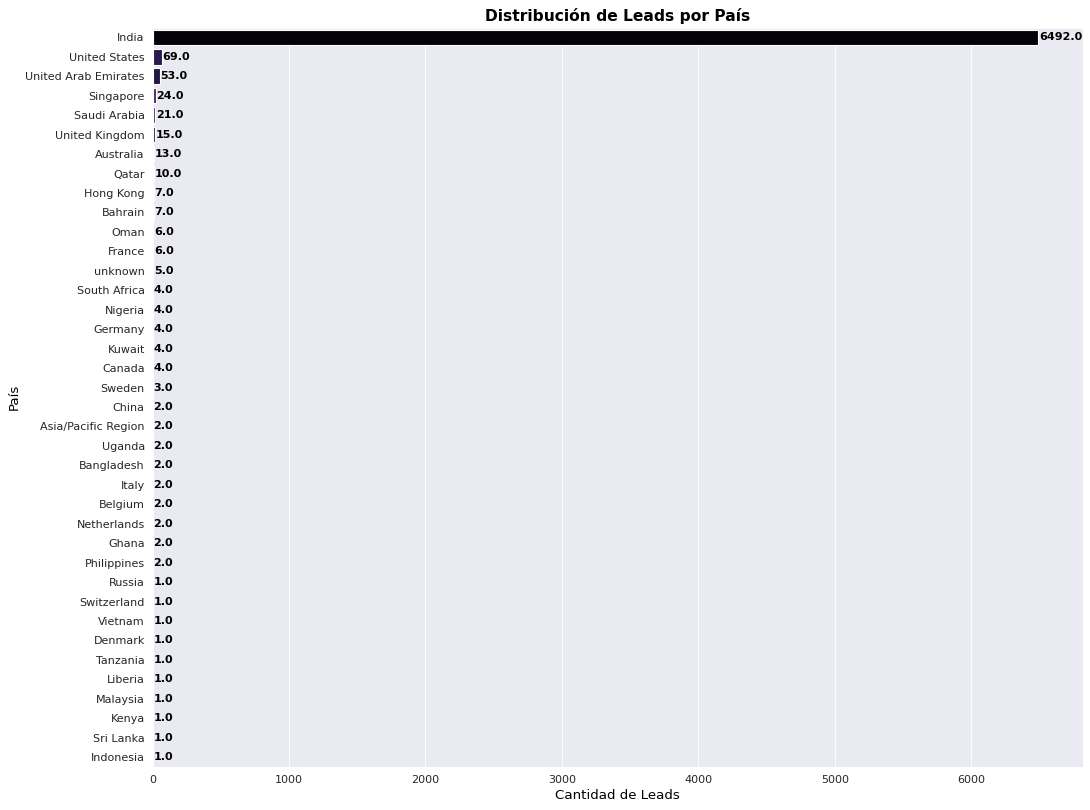

In [ ]:
# Analicemos Country: el país del lead
# Gráfico de Distribución de Leads por País
plt.figure(figsize=(15, 12), dpi=80)
sns.set_style("darkgrid")
ax = sns.countplot(
    y='Country',
    data=df,
    order=df['Country'].value_counts().index,
    hue= 'Country',
    palette="magma",
    legend=False
)
plt.title("Distribución de Leads por País", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Leads", fontsize=12, color='black')
plt.ylabel("País", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}',
                (p.get_width() + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', fontweight='bold')
plt.show()

El número de datos faltantes en la variable 'Country' representa más de una cuarta parte del total.  
Además, más de dos terceras partes de los registros pertenecen a India.  

Dado este contexto, no sería ideal simplemente asignar el valor 'Desconocido' a los valores nulos,  
especialmente cuando hay una alta probabilidad de que estos registros correspondan a India.  

Para una imputación más informada, podemos aprovechar otra variable disponible en los datos, como 'City',  
la cual podría ayudarnos a inferir el país correspondiente a los valores faltantes de manera más precisa.  

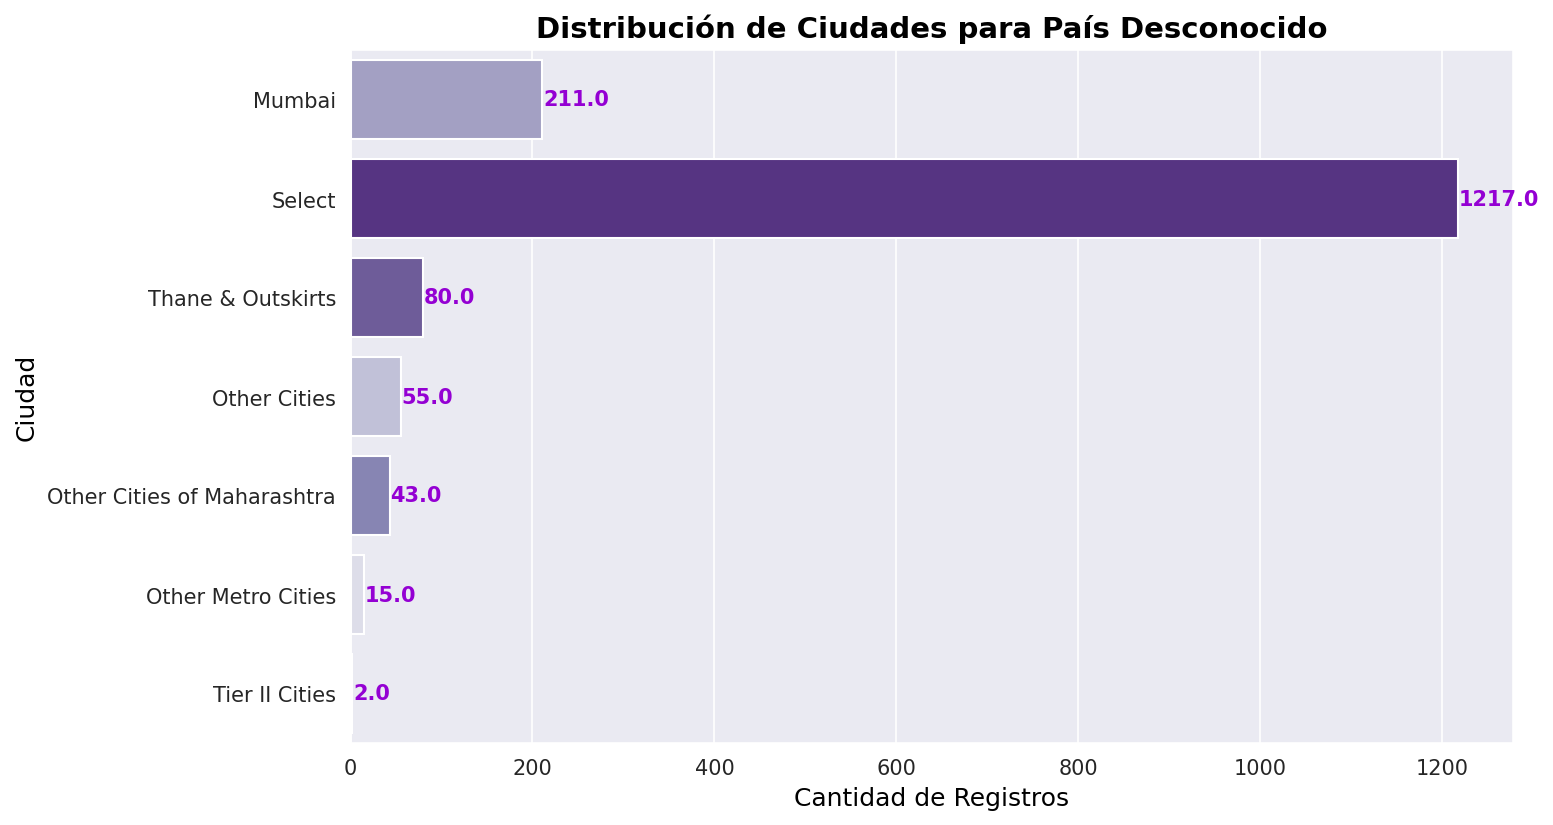

In [ ]:
# Grafiquemos la distribución de 'City' cuando 'Country' es un dato faltante
plt.figure(figsize=(10, 6), dpi=150)
sns.set_style("darkgrid")
ax = sns.countplot(
    y='City',
    data=df[df['Country'].isna()],
    order=df['City'].value_counts().index,
    hue =  'City',
    palette="Purples_r",
    legend = False
)
plt.title("Distribución de Ciudades para País Desconocido", fontsize=14, fontweight='bold', color='black')
plt.xlabel("Cantidad de Registros", fontsize=12, color='black')
plt.ylabel("Ciudad", fontsize=12, color='black')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=10, color='darkviolet', fontweight='bold')
plt.show()

🔍 Análisis y Tratamiento de Valores Faltantes en 'Country'

El análisis de la variable 'City' nos proporciona información clave para imputar los valores faltantes de 'Country'.  
Observamos que la mayoría de los registros pertenecen a la India y que ciertas ciudades son claramente indicativas de este país.

📌 Estrategia de Imputación:
- Si la ciudad es **Mumbai**, **Other Cities of Maharashtra** o **Thane & Outskirts**, asignamos **'India'** como país.
- Para las demás ciudades con 'Country' faltante, asignamos **'Desconocido'**, ya que no hay una relación tan evidente con un país específico.

Esta estrategia nos permite recuperar información valiosa sin introducir sesgo al dataset.  
Implementaremos esta lógica con un bucle `for` y una condición `if` anidada para asignar los valores de manera eficiente. 🚀

In [ ]:
ciudades_india = ['Mumbai','Other Cities of Maharashtra','Thane & Outskirts']

In [ ]:
for i in df[df['Country'].isnull()].index:
    if df.loc[i, 'City'] in ciudades_india:
        df.loc[i, 'Country'] = 'India'
    else:
        df.loc[i, 'Country'] = 'Desconocido'

📌 Corrección de Tipo de Datos: Variables de Fuente de Información

Las siguientes variables indican el canal a través del cual un cliente ha visto un anuncio o ha interactuado con la empresa:

🔹 **Search** → Cliente encontró el anuncio mediante una búsqueda en la web.  
🔹 **Magazine** → Cliente vio el anuncio en una revista.  
🔹 **Newspaper Article** → Cliente encontró el anuncio en un artículo de periódico.  
🔹 **X Education Forums** → Cliente descubrió el anuncio en un foro de educación.  
🔹 **Newspaper** → Cliente vio el anuncio en un periódico.  
🔹 **Digital Advertisement** → Cliente encontró el anuncio en un anuncio digital.  
🔹 **Through Recommendations** → Cliente llegó por recomendaciones.  
🔹 **Receive More Updates About Our Courses** → Cliente optó por recibir más información sobre los cursos.

✅ **Conversión a valores booleanos:**  
Para facilitar el análisis y mejorar la interpretación en modelos, convertiremos estas variables en valores `0` (No) y `1` (Sí).  
Esto permitirá una manipulación más eficiente y una integración directa en modelos predictivos. 🚀

In [ ]:
# Las variables son similares, y no tienen valores faltantes
# Les daremos un tratamiento similar. Lo convertiremos a valores booleanos con un lazo for
mapeo_binario = {'Yes': 1, 'No': 0}
for col in ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses']:
    df[col] = df[col].replace(mapeo_binario).astype(bool)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924

<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeo_binario).astype(bool)
<ipython-input-395-1b864ca36ec8>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

📌 Manejo de Valores Nulos: Variables Categóricas

Algunas características en nuestro dataset contienen valores nulos que deben ser tratados para evitar sesgos o pérdida de información. Veamos cuáles son y cómo abordarlas:

🔹 **Specialization** → Representa el dominio de la industria en la que el cliente trabajó anteriormente.  
   📌 Incluye la opción 'Select Specialization', lo que indica que el cliente no eligió ninguna opción al llenar el formulario.  

🔹 **How did you hear about X Education** → Fuente por la cual el cliente conoció X Education.  
   📌 Es clave para evaluar la efectividad de los canales de comunicación.  

🔹 **What is your current occupation** → Indica si el cliente es estudiante, desempleado o empleado.  
   📌 Nos da contexto sobre el perfil del usuario y su disponibilidad para el curso.  

🔹 **What matters most to you in choosing a course** → Opción elegida por el cliente sobre el principal motivo para tomar el curso.  

✅ **Estrategia de Imputación:**  
Para manejar estos valores nulos, primero evaluaremos su distribución.  
Podemos imputar los valores faltantes uno a uno manualmente o utilizar un **bucle for** para automatizar el proceso, garantizando un tratamiento uniforme y eficiente.  

In [ ]:
# Examinaremos la distribución de las variables de formulario
# Tambien haremos una lista de las 4 variables, y luego haremos un lazo for para graficarlas como subplots.
variables = ['Specialization', 'How did you hear about X Education',
             'What is your current occupation','What matters most to you in choosing a course']

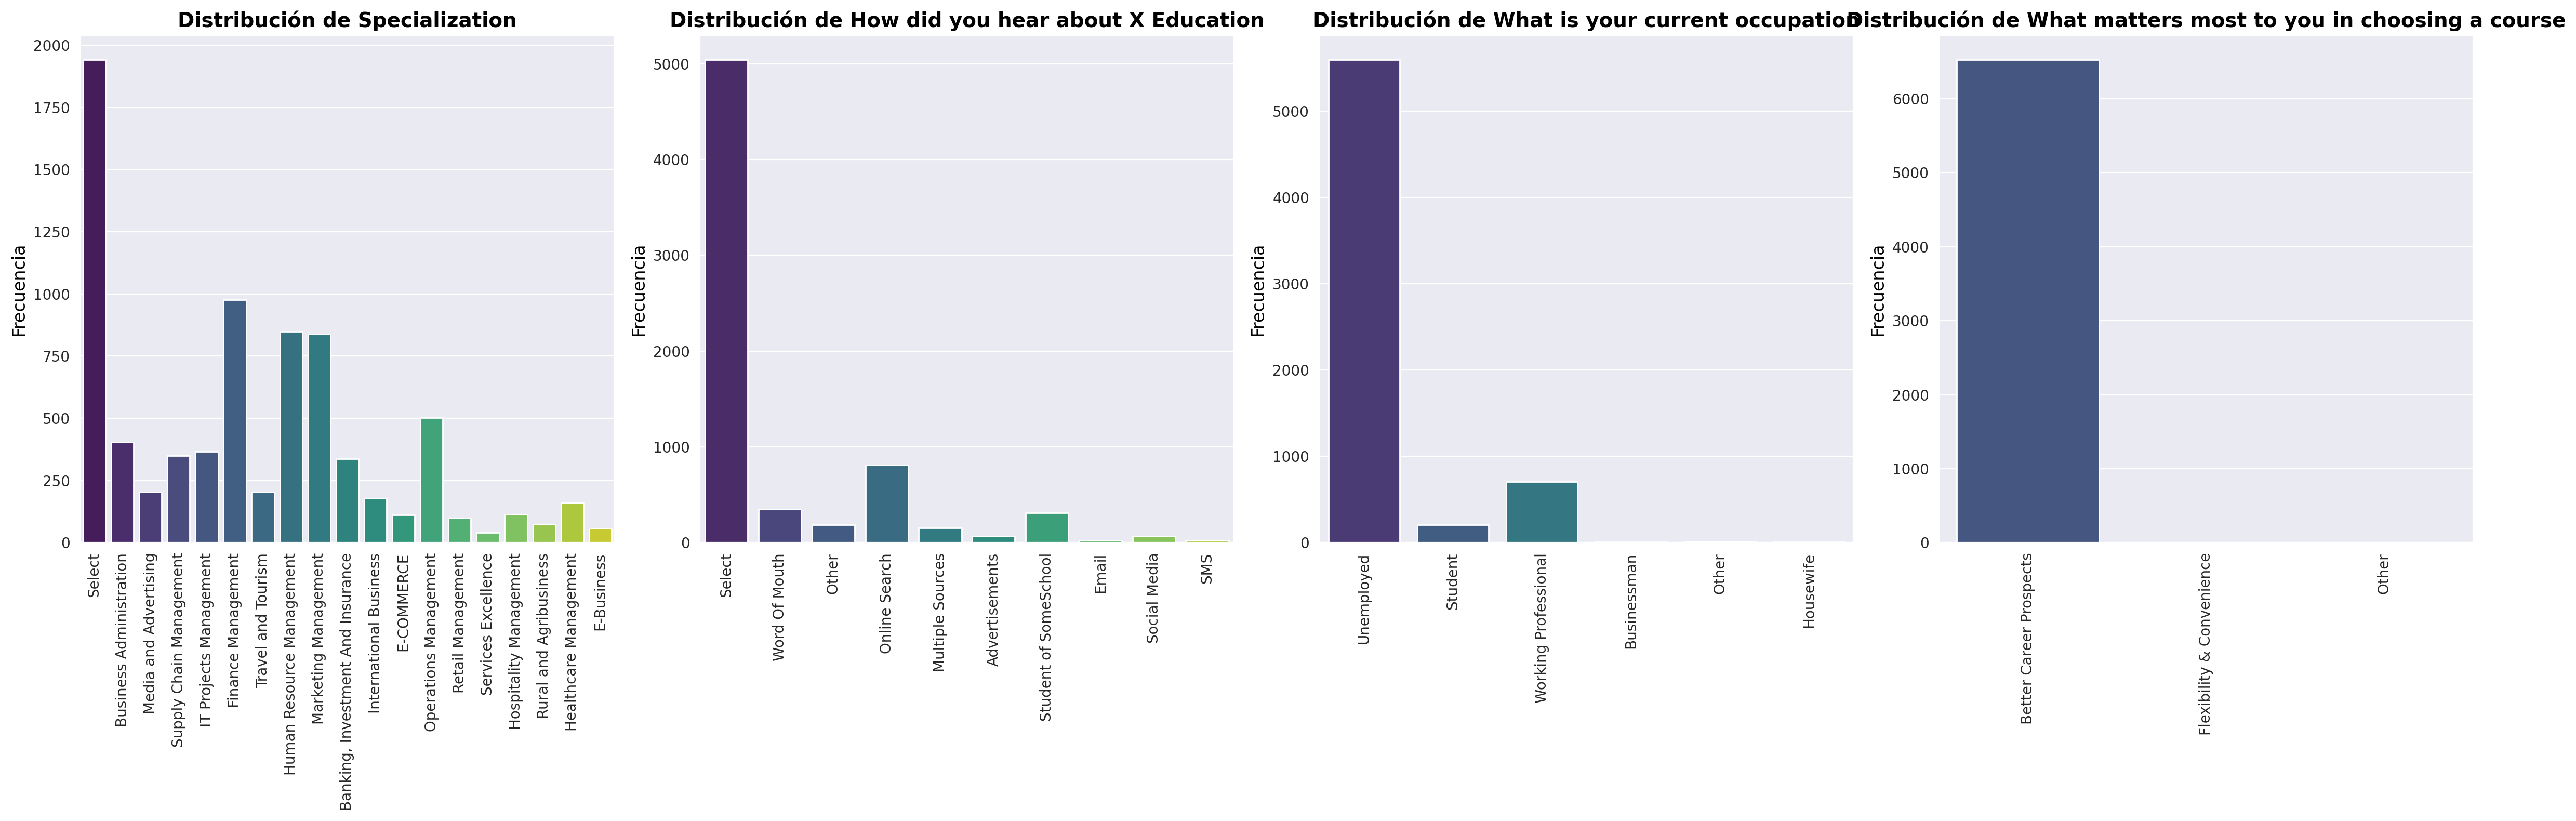

In [ ]:
# Graficamos
fig, ejes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8), dpi=200)
paleta_colores = sns.color_palette("viridis", as_cmap=True)
#Iteracion sobre las variables
for i, ax in enumerate(ejes):
    sns.countplot(
        x=variables[i],
        data=df,
        ax=ax,
        hue=variables[i],
        palette="viridis",
        legend=False
    )
    ax.set_title(f"Distribución de {variables[i]}", fontsize=14, fontweight='bold', color='black')
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia", fontsize=12, color='black')
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()


# 🔍 Análisis de variables categóricas y manejo de valores faltantes
Los gráficos muestran la distribución de valores para distintas variables categóricas dentro del conjunto de datos.
Se observa que una gran cantidad de registros tienen la etiqueta 'Select', lo cual indica que el usuario no eligió ninguna opción
al completar el formulario. En términos de análisis de datos, estos valores son equivalentes a datos faltantes, ya que no aportan
información útil sobre la categoría real.

📌 **Caso especial: 'What matters most to you in choosing a course'**
En esta variable, la opción 'Better Career Prospects' domina significativamente sobre 'Flexibility & Convenience' y 'Others'.
Esto sugiere que la mayoría de los encuestados priorizan las oportunidades de crecimiento profesional al seleccionar un curso.

🛠 **Posible estrategia de imputación**
Si fuera necesario, podríamos imputar los valores faltantes utilizando la moda ('Better Career Prospects'), ya que esta opción
es abrumadoramente la más elegida. Sin embargo, para garantizar la coherencia y mantener la integridad de los datos,
optaremos por asignar 'Desconocido' a los valores faltantes en todas las variables, incluida esta.

✅ **Conclusión**
Aunque la imputación con la moda es una alternativa válida en este caso, seguiremos un enfoque más conservador y
neutralizando la incertidumbre con la categoría 'Desconocido'.

In [ ]:
# Reemplacemos los valores 'Select' y faltantes con 'Desconocido'
for c in variables:
    df[c] = df[c].replace('Select', 'Desconocido')
    df[c] = df[c].fillna('Desconocido')

Corrección de Tipo de Datos: Update me on Supply Chain Content, Get updates on DM Content

Estas variables indican si el cliente ha expresado interés en recibir actualizaciones sobre ciertos temas:

- 'Update me on Supply Chain Content': Muestra si el cliente desea recibir actualizaciones sobre el contenido de la cadena de suministro.
- 'Get updates on DM Content': Indica si el cliente quiere recibir actualizaciones sobre el contenido de DM.

Para mejorar su manipulación, interpretación y uso en modelos, convertiremos estas características en valores booleanos.

In [ ]:
for c in ['Update me on Supply Chain Content', 'Get updates on DM Content']:
    df[c] = df[c].map({'Yes': 1, 'No': 0}).astype(bool)

📌 **Eliminar variable: Tags**

🔍 **¿Qué es 'Tags'?**  
Es una etiqueta asignada a los clientes que indica su estado actual como potenciales clientes dentro del embudo de marketing.

❌ **¿Por qué eliminarla?**  
'Tags' se asigna en función del avance del cliente en el proceso de conversión. Esto significa que está **altamente correlacionada** con la variable que queremos predecir (Converted). En otras palabras, sería como usar la respuesta de un examen para predecir la nota: ¡no tiene sentido! 🚫📉

📖 **Un poco de teoría**  
En estadística y modelos predictivos, **una variable endógena** es aquella cuyo valor está influenciado por otras variables dentro del sistema. En este caso, 'Tags' se asigna en función del avance en el embudo de ventas, por lo que está **dentro del proceso de conversión** y no debe ser considerada como una variable independiente.

🛠️ **Decisión final:**  
Para evitar sesgos y garantizar un modelo sólido, eliminamos la variable 'Tags' antes del modelado. 🔥

In [ ]:
# Eliminamos variable Tags
df.drop(columns='Tags', axis = 1, inplace = True)

📌 **Eliminar variable: Lead Quality**

🔍 **¿Qué es 'Lead Quality'?**  
Es una evaluación subjetiva de la calidad de un potencial cliente, basada en los datos disponibles y en la intuición del empleado asignado. 🧐📊

❌ **¿Por qué eliminarla?**  
El objetivo de nuestro modelo es calcular el **Lead Score**, una métrica objetiva para evaluar la calidad de un lead. Si usamos 'Lead Quality' como variable de entrada, estaríamos introduciendo **redundancia** y posiblemente **sesgo humano**, lo que afectaría la imparcialidad del modelo. ⚠️📉

📖 **Concepto clave**  
Si una variable está directamente relacionada con la métrica que queremos predecir, incluirla en el modelo **puede generar una falsa sensación de precisión**, pero en realidad solo estamos dándole la respuesta al modelo. ¡Eso no es Machine Learning real! 🚀

In [ ]:
# Eliminamos variable Lead Quality
df.drop(columns='Lead Quality', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        924


📌 **Manejo de Nulos: Lead Profile**

🔍 **¿Qué es 'Lead Profile'?**  
Es un nivel asignado a cada cliente según su perfil, lo que ayuda a clasificar los leads en función de sus características y potencial. 🎯📊

❓ **¿Por qué manejar los nulos?**  
Si 'Lead Profile' tiene valores faltantes, podríamos estar perdiendo información clave para la segmentación de clientes. Sin embargo, antes de imputar estos valores, es importante analizar su distribución. 📉🧐

📊 **Paso a paso:**  
1️⃣ **Explorar la distribución** → ¿Es una variable categórica balanceada o hay una categoría dominante?  
2️⃣ **Determinar la mejor estrategia** → Podemos imputar con la moda (categoría más frecuente) o etiquetar los nulos como 'Desconocido' si la variabilidad es alta.  
3️⃣ **Aplicar la imputación** → ¡Sin sesgar el modelo! Siempre considerando la coherencia con el resto de los datos. 🚀  




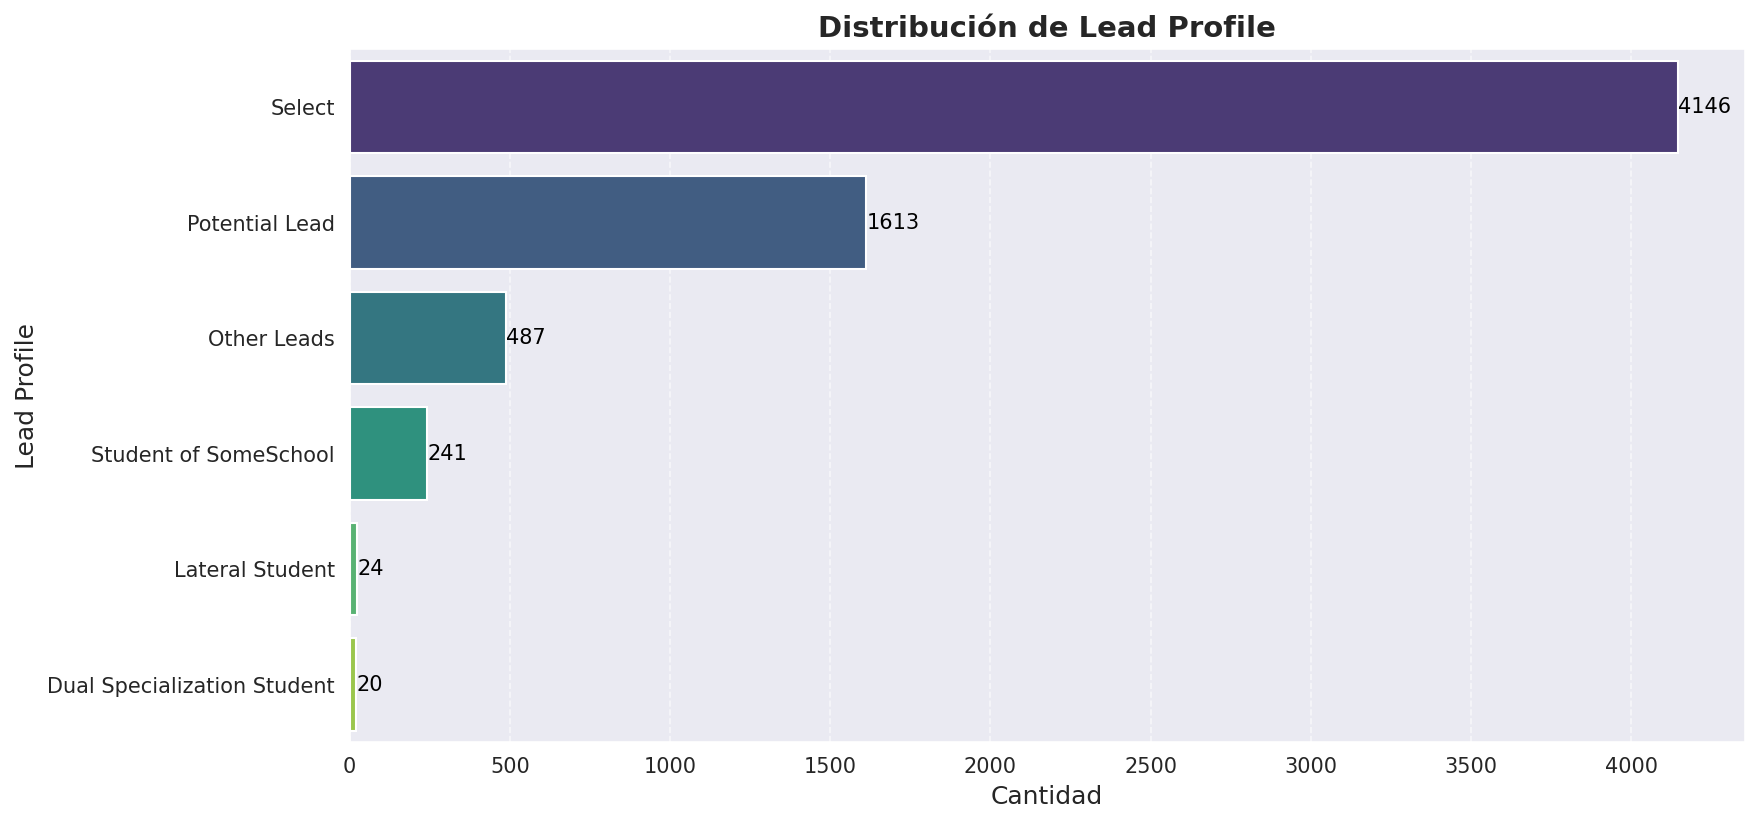

In [ ]:
# Gráfico de Distribución de Lead Profile
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(
    y=df['Lead Profile'].value_counts().index,
    x=df['Lead Profile'].value_counts().values,
    palette='viridis',
    hue=df['Lead Profile'].value_counts().index,
    legend=False
)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Lead Profile', fontsize=12)
plt.title('Distribución de Lead Profile', fontsize=14, fontweight='bold')
for index, value in enumerate(df['Lead Profile'].value_counts().values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [ ]:
# Reemplacemos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido
df['Lead Profile'] = df['Lead Profile'].replace('Select', 'Desconocido')

In [ ]:
df['Lead Profile'] = df['Lead Profile'].fillna('Desconocido')


#📌 Manejo de Nulos: City

La variable 'City' representa la ciudad del cliente potencial. 🌍

🔎 Antes de decidir cómo manejar los valores nulos, es fundamental analizar su distribución.
¿Los datos están concentrados en unas pocas ciudades o son bastante variados? ¿Existen patrones en los valores faltantes?

🎯 Basándonos en este análisis, podremos elegir la mejor estrategia de imputación:
   - 🔹 Si la mayoría de los datos pertenecen a una ciudad en particular, podríamos imputar la moda.
   - 🔹 Si la distribución es uniforme, podríamos etiquetar los valores nulos como 'Desconocido'.
   - 🔹 O bien, en casos específicos, podríamos imputar según características relacionadas como el país o la región del cliente.

✨ Una correcta imputación garantiza que los datos sean más confiables y útiles en el análisis posterior.

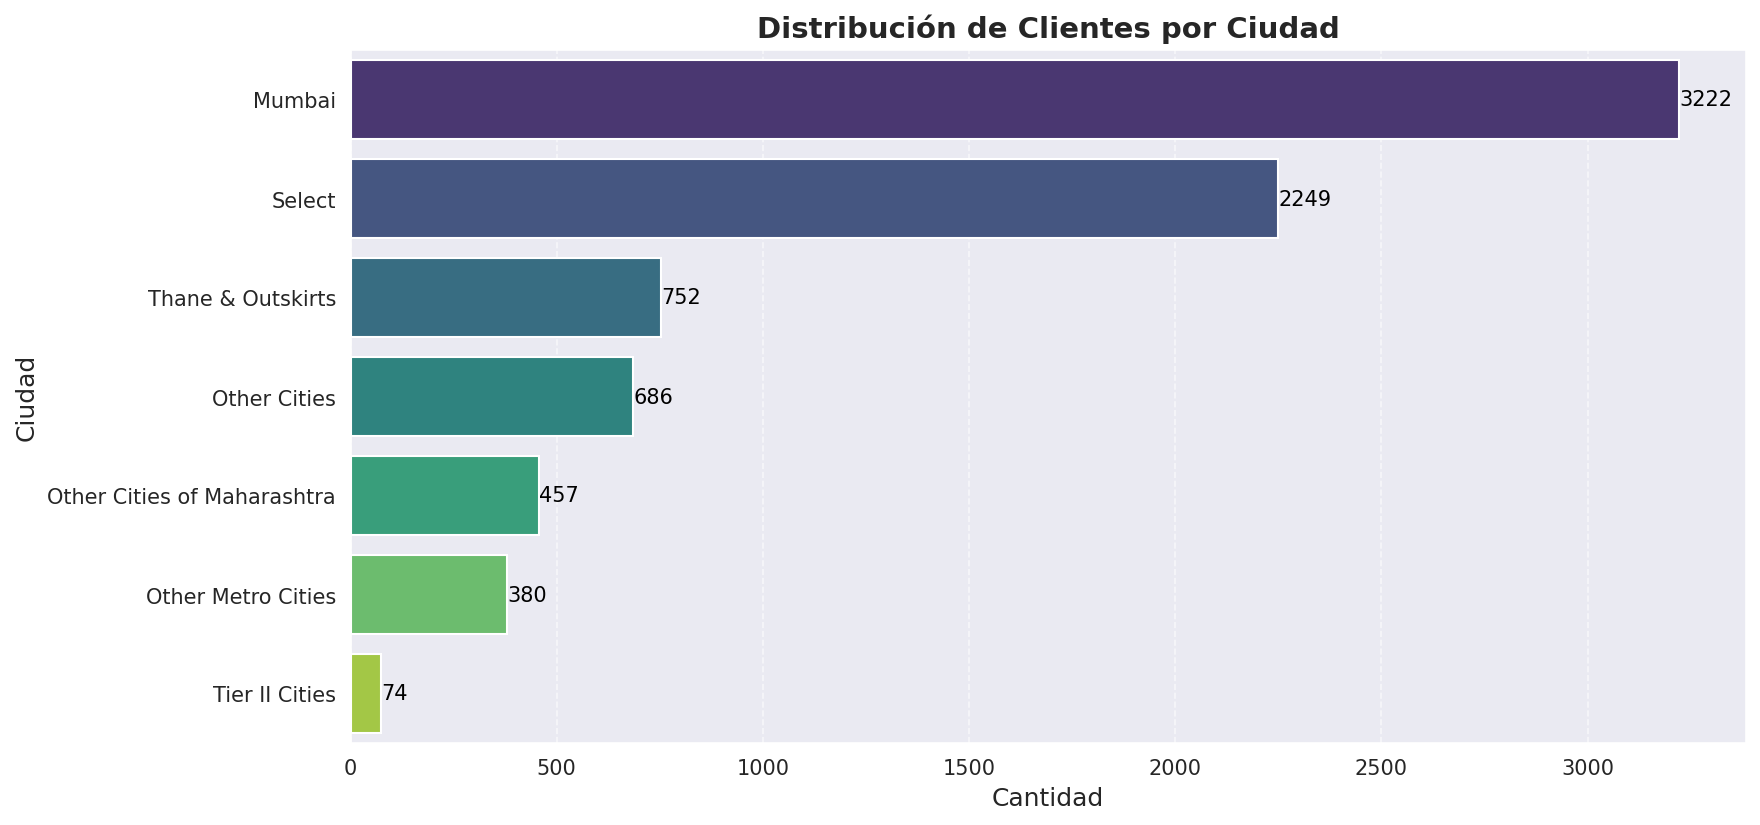

In [ ]:
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(
    y=df['City'].value_counts().index,
    x=df['City'].value_counts().values,
    palette='viridis',
    hue=df['City'].value_counts().index,
    legend=False
)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.title('Distribución de Clientes por Ciudad', fontsize=14, fontweight='bold')
for index, value in enumerate(df['City'].value_counts().values):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


Una gran parte de los valores son "Select", lo cual es equivalente a un nulo.

In [ ]:
# Reemplacemos Select por Desconocido
# Rellenemos los valores faltantes con Desconocido
df['City'] = df['City'].replace({'Select': 'Desconocido'})
df['City'] = df['City'].fillna('Desconocido')


📌 **Corrección de Tipo de Datos:**  
Las siguientes variables representan respuestas binarias (Sí/No) y se convertirán en valores booleanos (`True`/`False`) para facilitar su análisis y uso en modelos predictivos:

🔹 **I agree to pay the amount through cheque:**  
   Indica si el cliente ha aceptado realizar el pago mediante cheque.  

🔹 **A free copy of Mastering The Interview:**  
   Indica si el cliente ha solicitado una copia gratuita del libro *Mastering The Interview*.  

✅ **Razón de la conversión:**  
Al transformar estas variables a formato booleano, se facilita la manipulación, interpretación y modelado de los datos, optimizando su uso en análisis y predicciones.  

In [ ]:
# Convirtamos las variables Yes/No a booleanos
columns_to_convert = ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.map({'Yes': True, 'No': False}))


Corrección del tipo de datos: Object to Category

In [ ]:
# Convirtamos los datos tipo string a categorias
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

📊 Índices y Puntuaciones Asimétricas 📊

Los siguientes indicadores cuantifican la actividad y el perfil de cada cliente, proporcionando información sobre su comportamiento y características dentro del sistema:

🔹 **Asymmetrique Activity Index**:
   - Clasifica la actividad del cliente en tres niveles: **Alto, Medio y Bajo**.
   - Permite identificar qué tan activo ha sido un cliente en función de sus interacciones.

🔹 **Asymmetrique Profile Index**:
   - Categoriza el perfil del cliente en tres niveles: **Alto, Medio y Bajo**.
   - Ayuda a segmentar a los clientes según sus características demográficas o de comportamiento.

🔹 **Asymmetrique Activity Score**:
   - Asigna una puntuación numérica a cada cliente en función de su actividad.
   - Puede utilizarse para identificar clientes altamente comprometidos.

🔹 **Asymmetrique Profile Score**:
   - Otorga una puntuación basada en el perfil del cliente.
   - Permite evaluar qué tan alineado está un cliente con el perfil ideal.

📌 **Siguiente paso**: Evaluar la distribución de estos indicadores para determinar el método de imputación de nulos más adecuado.

In [ ]:
# Estadísticas descriptivas de los scores
estadisticas_scores = pd.DataFrame(
    {'Assymmetrique Activity Score': df['Asymmetrique Activity Score'].describe(),
    'Asymmetrique Profile Score': df['Asymmetrique Profile Score'].describe()})
estadisticas_scores

,Assymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


In [ ]:
# Notemos que la mediana, está un poco a la izquiera (es decir es menor) que la media en ambos casos. Para confirmar,
# hágamos un histograma
# Grafiquemos la distribución de los scores
scores = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

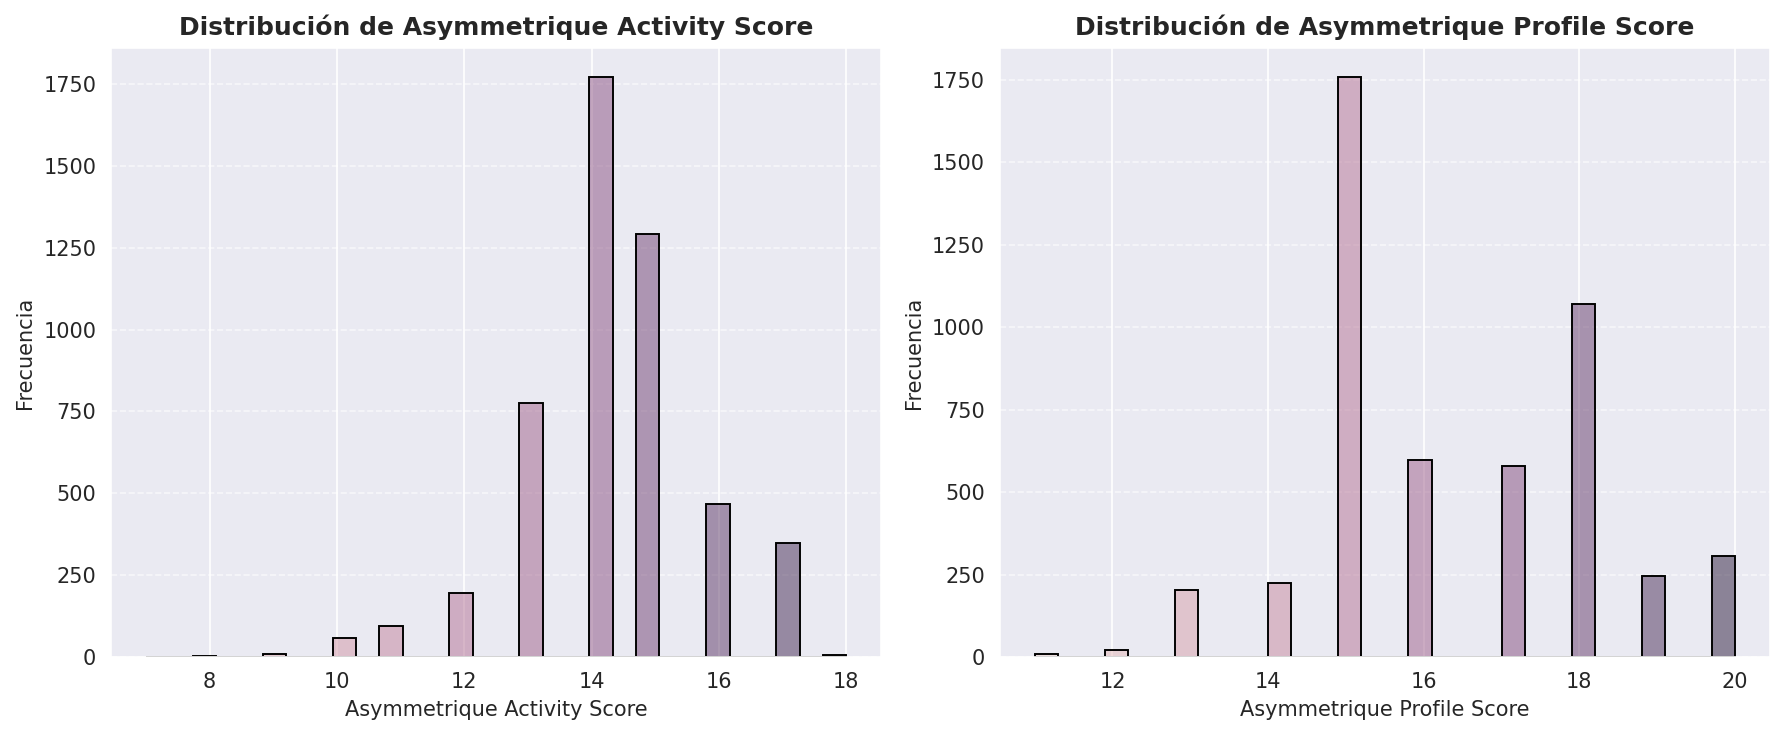

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=150)
for i, score in enumerate(scores):
    sns.histplot(
        data=df, x=score, ax=axes[i],
        bins=30, kde=True, color="royalblue", edgecolor="black",
        hue=score, legend=False
    )
    axes[i].set_title(f'Distribución de {score}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(score, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Ambas distribuciones están sesgadas, lo que significa que el uso de la media podría no ser la mejor opción para imputar valores faltantes.
Dado que la mediana es menos sensible a valores atípicos y proporciona una mejor representación central en distribuciones sesgadas,
es más adecuado utilizarla para el llenado de datos nulos en este caso.

In [ ]:
for s in scores:
    df.loc[:, s] = df[s].fillna(df[s].median())


In [ ]:
# Ahora realizaremos un histograma para los índices
indices = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

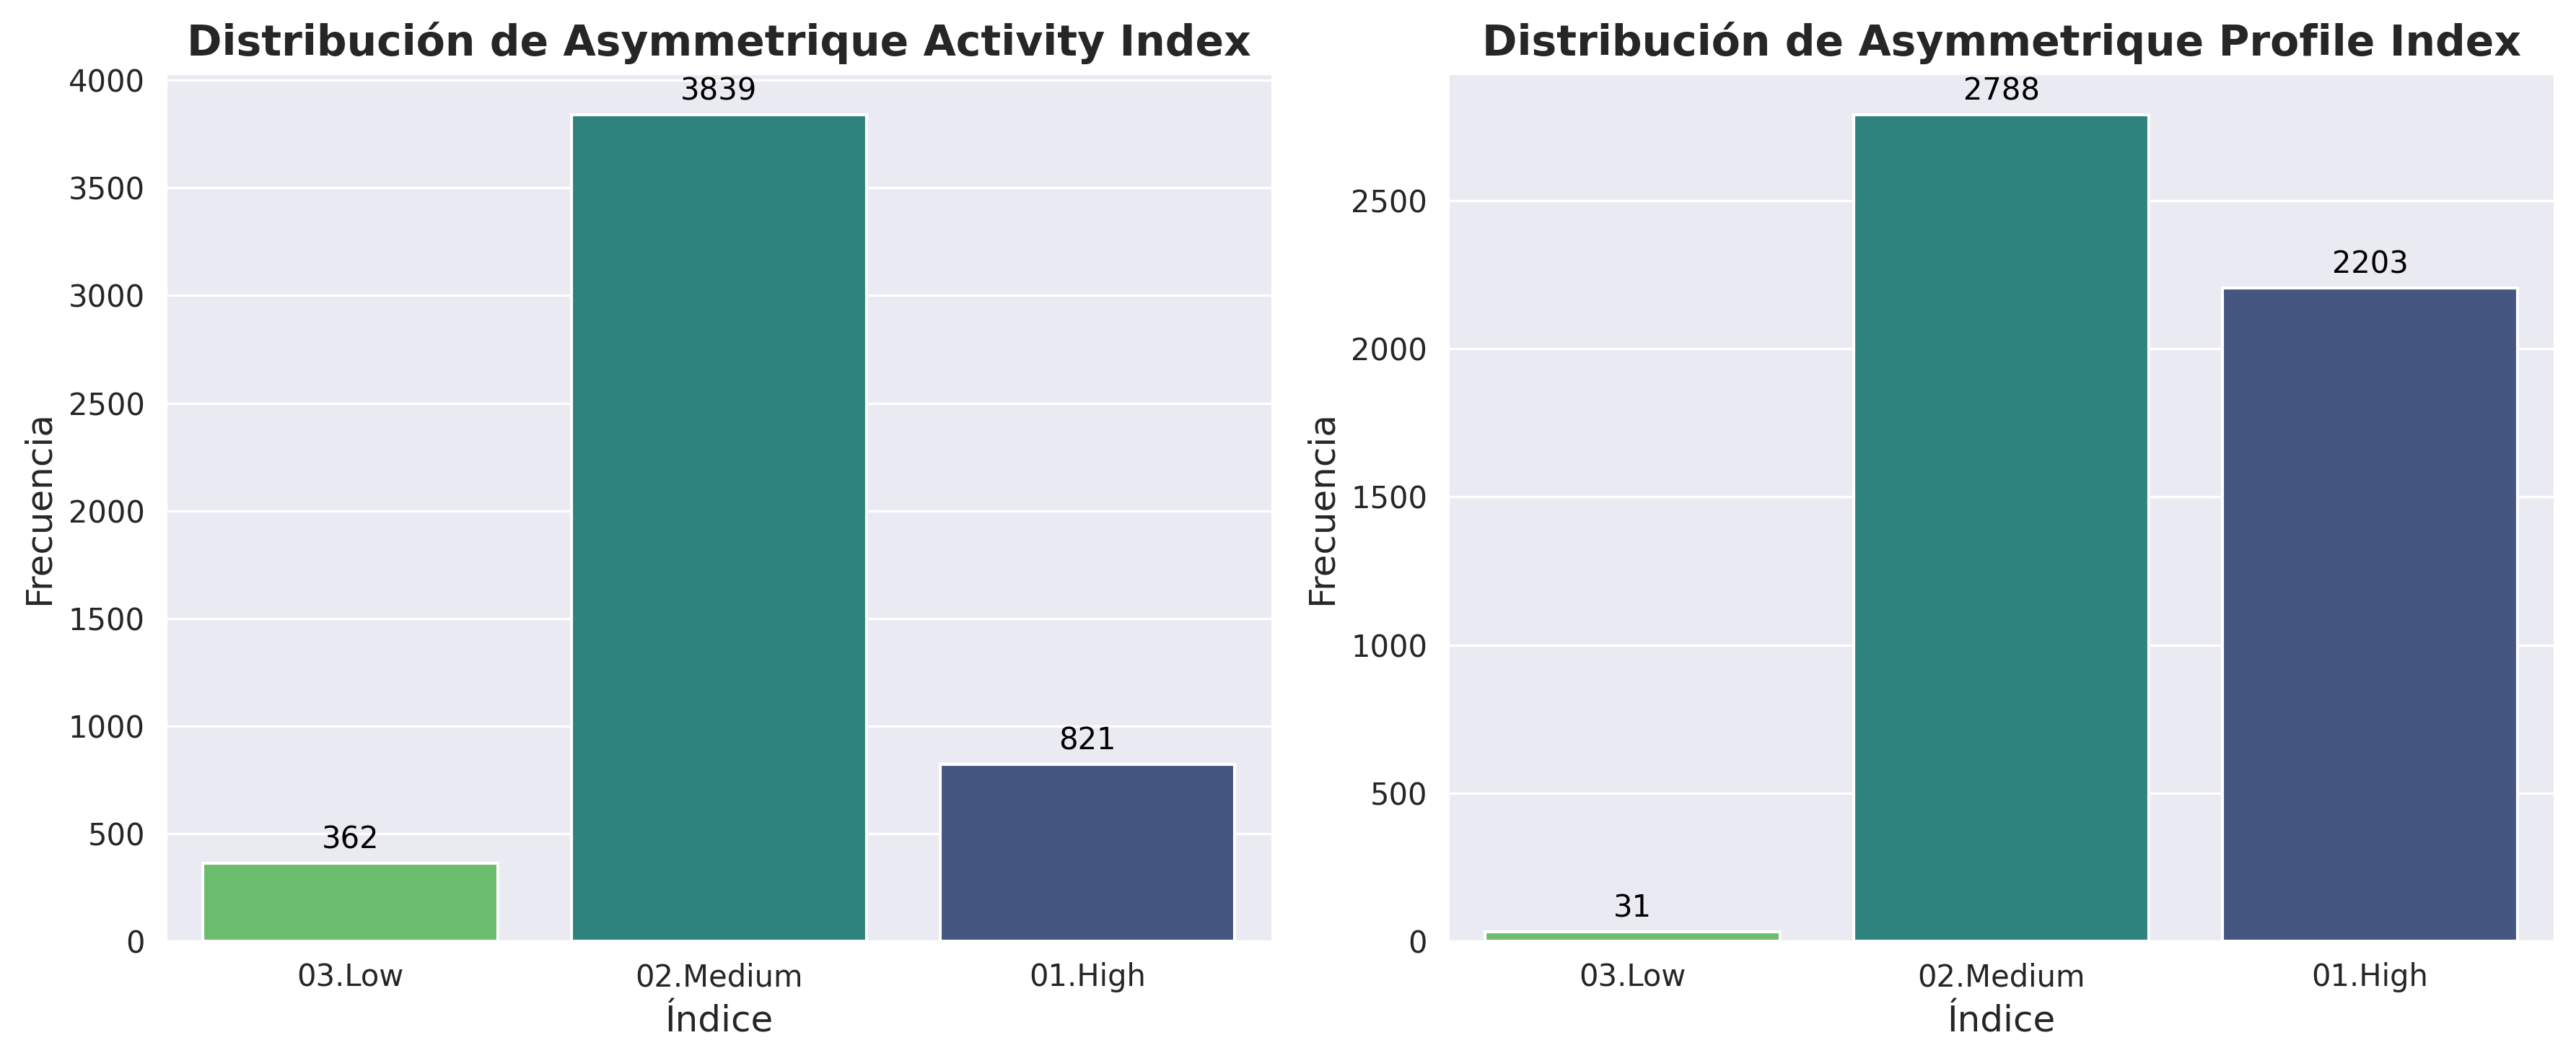

In [ ]:
fig, ejes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=300)
for i, ax in enumerate(ejes):
    sns.countplot(
        x=indices[i],
        data=df,
        ax=ax,
        order=['03.Low', '02.Medium', '01.High'],
        palette='viridis',
        hue=indices[i],
        legend=False
    )
    ax.set_xlabel("Índice", fontsize=12)
    ax.set_ylabel("Frecuencia", fontsize=12)
    ax.set_title(f"Distribución de {indices[i]}", fontsize=14, fontweight='bold')


    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


🔍 **Análisis de Índices y Puntuaciones Asimétricas**  

Parece que las características del índice (`Asymmetrique Activity Index` y `Asymmetrique Profile Index`) podrían ser simplemente una categorización de las puntuaciones asimétricas (`Asymmetrique Activity Score` y `Asymmetrique Profile Score`).  

📌 **¿Por qué esto es importante?**  
Si los índices solo reflejan rangos de las puntuaciones, entonces son redundantes y no aportan información adicional. En este caso, podríamos eliminarlos sin perder valor en el análisis.  

📊 **¿Cómo lo comprobamos?**  
Para verificarlo, podemos calcular la puntuación asimétrica promedio para cada categoría de índice. Si encontramos una relación clara (por ejemplo, que los valores "High" siempre tienen una puntuación más alta y "Low" siempre una más baja), entonces confirmamos que los índices no añaden información nueva.  

🛠 **Próximo paso:**  
Procederemos a analizar la relación entre los índices y las puntuaciones para tomar una decisión informada sobre su inclusión en el modelo.  

In [ ]:
# Agruparemos por el Índice de Actividad Asimétrico
agrupados_por_activity_index = (
    df.groupby('Asymmetrique Activity Index', observed=True)['Asymmetrique Activity Score']
    .mean()
    .reset_index()
    .rename(columns={'Asymmetrique Activity Score': 'Media Activity Score'})
)
agrupados_por_activity_index

,Asymmetrique Activity Index,Media Activity Score
0,01.High,16.437272
1,02.Medium,14.134931
2,03.Low,11.290055


In [ ]:
# Ahora agrupamos por el Índice de Perfil Asimétrico
agrupados_por_profile_index = (
    df.groupby('Asymmetrique Profile Index', observed=True)['Asymmetrique Profile Score']
    .mean()
    .reset_index()
    .rename(columns={'Asymmetrique Profile Score': 'Media Profile Score'})
)

agrupados_por_profile_index

,Asymmetrique Profile Index,Media Profile Score
0,01.High,18.128007
1,02.Medium,14.987446
2,03.Low,11.709677


Como se puede observar de los cálculos anteriores, los valores de Asymmetrique Activity/Profile Index parecen simplemente agrupar los Asymmetrique Activity/Profile Scores. Como resultado, las características del índice son redundantes y pueden ser eliminadas.

In [ ]:
# Elimemos las columnas de índice
df.drop(columns=['Asymmetrique Profile Index','Asymmetrique Activity Index'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9240 non-null   category
 1   Lead Source                                    9240 non-null   category
 2   Do Not Email                                   9240 non-null   bool    
 3   Do Not Call                                    9240 non-null   bool    
 4   Converted                                      9240 non-null   bool    
 5   TotalVisits                                    9240 non-null   float64 
 6   Total Time Spent on Website                    9240 non-null   int64   
 7   Page Views Per Visit                           9240 non-null   float64 
 8   Last Activity                                  9240 non-null   category
 9   Country                                

# 📊 Análisis Exploratorio de las Variables Categóricas 🚀

Antes de sumergirnos en modelos y predicciones, hagamos una pausa para conocer mejor nuestras variables categóricas.  
¿Por qué? Porque entender su distribución nos ayudará a detectar patrones, valores atípicos y posibles sesgos en los datos.  

En esta sección, visualizaremos la frecuencia de cada categoría para responder preguntas clave como:  
✅ ¿Existen categorías dominantes?  
✅ ¿Tenemos clases poco representadas que podrían afectar el análisis?  
✅ ¿Es necesario agrupar o transformar algunas categorías?  

Acompáñame en este recorrido por nuestros datos. ¡Vamos a descubrir qué historias nos cuentan! 📊✨

📊 Función `conteo_de_convertidos`: Visualización de Conversión por Categoría  

Esta función genera un gráfico de barras (`countplot`) para comparar la cantidad de clientes convertidos y no convertidos  
en relación con una variable categórica específica.  

🔹 Nos ayudará a identificar patrones y tendencias en las variables categóricas.  
🔹 Facilita la interpretación de la distribución de conversiones dentro de cada categoría.  

¡Una herramienta clave para entender mejor nuestros datos antes del modelado! 🚀

In [ ]:
def conteo_de_convertidos(independiente, dependiente='Converted'):
    """
    📊 Genera un gráfico de barras para comparar la cantidad de clientes convertidos y no convertidos
    en función de una variable categórica.

    🔹 independiente: Variable categórica a analizar.
    🔹 dependiente: Variable de conversión (por defecto 'Converted').
    """
    plt.figure(figsize=(12, 6), dpi=150)
    ax = sns.countplot(
        y=independiente,
        data=df,
        hue=dependiente,
        order=df[independiente].value_counts().index,
        palette="viridis",
        edgecolor="black"
    )

    plt.title(f"Distribución de '{independiente}' por Conversión", fontsize=14, fontweight='bold')
    plt.xlabel("Cantidad", fontsize=12)
    plt.ylabel(independiente, fontsize=12)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(title=dependiente, fontsize=10, loc='lower right', frameon=False)


    for p in ax.patches:
        if p.get_width() > 0:
            ax.annotate(
                f"{int(p.get_width())}",
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points'
            )

    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [ ]:
# Ahora calcularemos la razón de conversión de leads en todo el conjunto de datos
tasa_de_conversion = round(df['Converted'].mean(), 2)
tasa_de_conversion

0.39

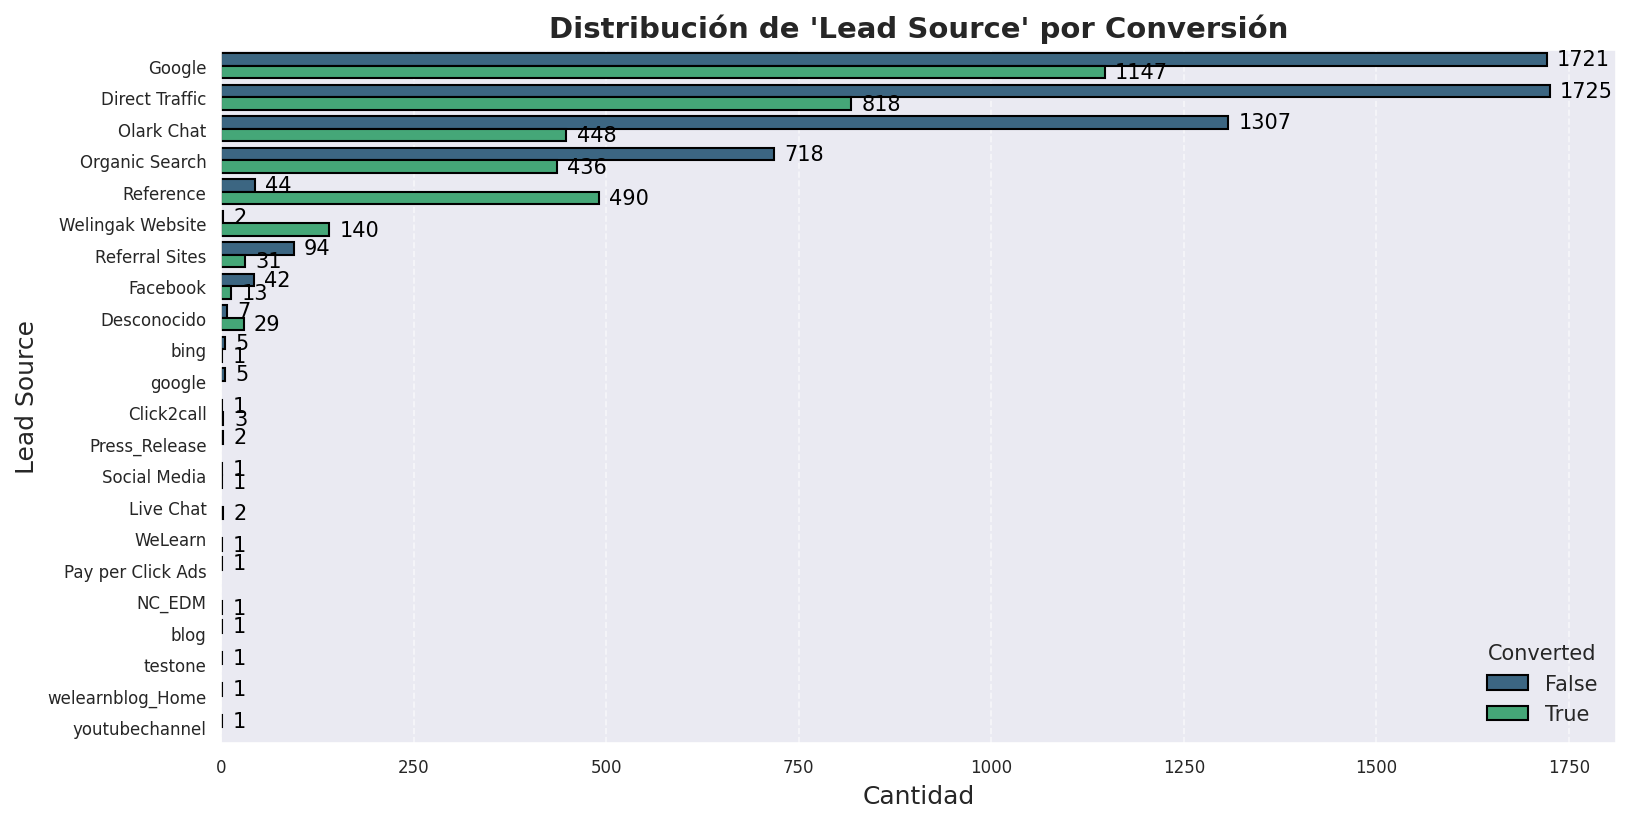

In [ ]:
# Análisis Exploratorio de una Variable: Lead Source
conteo_de_convertidos('Lead Source')

📌 Los leads que provienen del sitio web de Wellingak o por referencia tienen una tasa de conversión más alta.
   ➡️ Esto sugiere que fortalecer estas fuentes podría mejorar la conversión general.  

📌 Aunque Google y el Tráfico Directo generan un número similar de leads,
   ➡️ La conversión es mayor en los leads provenientes de Google.  
   
📌 La Búsqueda Orgánica genera menos leads en comparación con Google,
   ➡️ Sin embargo, ambas fuentes muestran tasas de conversión similares.  
   
🔎 💡 Recomendación: Enfocar esfuerzos en mejorar la captación desde Google y Wellingak,
   así como potenciar las referencias para maximizar la conversión.

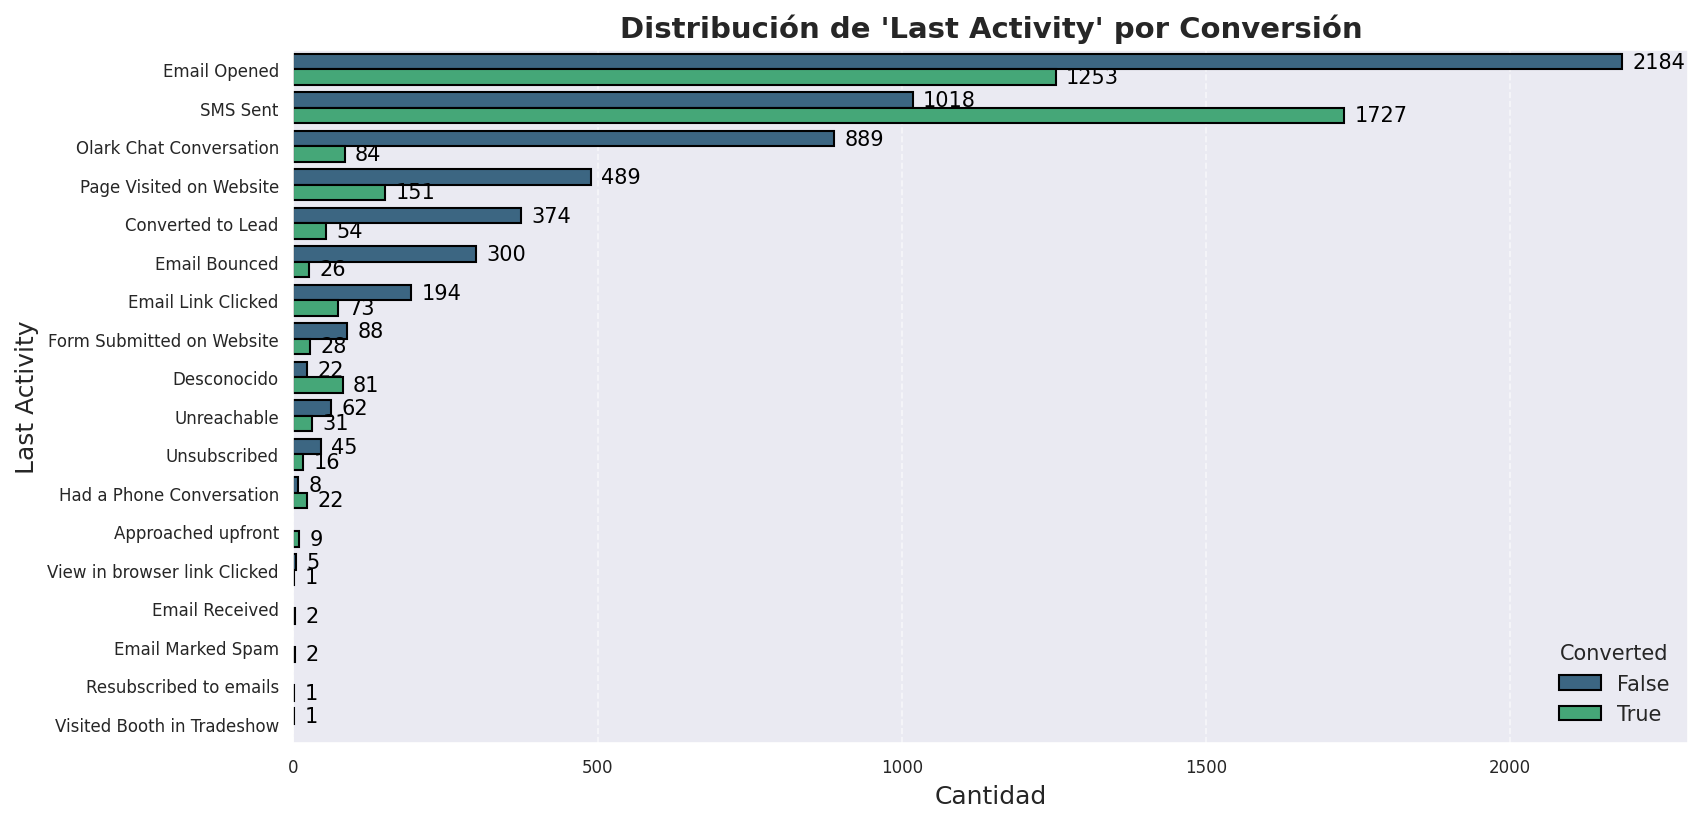

In [ ]:
# Análisis Exploratorio de una Variable: Last Activity
conteo_de_convertidos('Last Activity')

🔥 La actividad con la mayor tasa de conversión es, sin duda, el **Envío de SMS**.  
   ➡️ Esto podría indicar que los mensajes de texto son altamente efectivos en la conversión de leads. 📲✅  

🤔 Sin embargo, es necesario un análisis más profundo:  
   🔹 ¿Es realmente la efectividad del SMS lo que impulsa la conversión?  
   🔹 ¿O simplemente ocurre en una etapa avanzada del proceso, cuando el lead ya está listo para convertirse?  
🔎

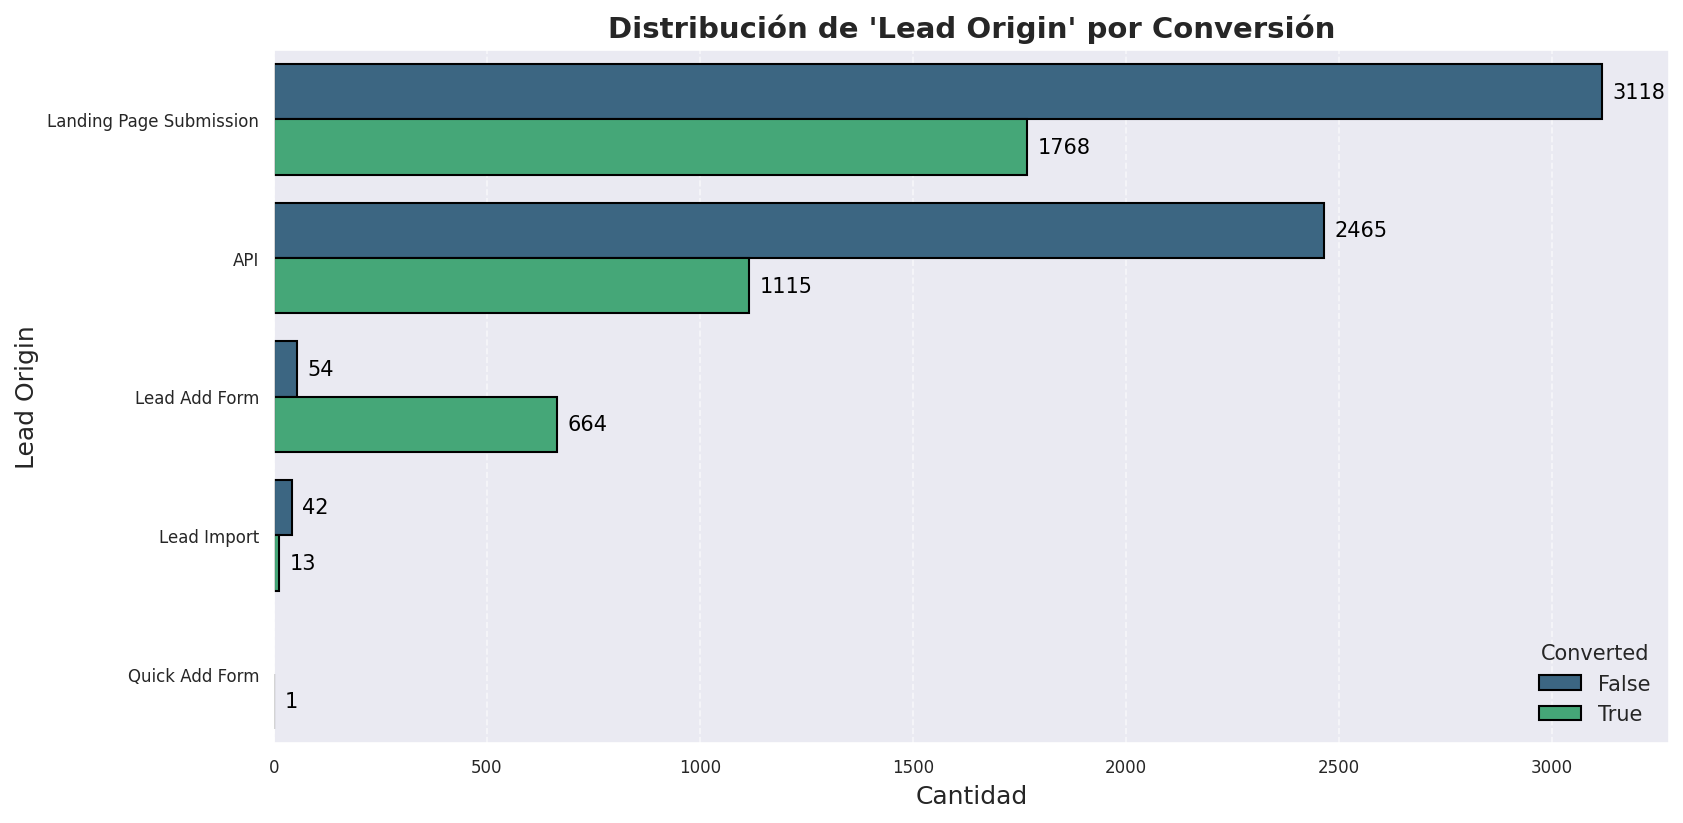

In [ ]:
# Análisis Exploratorio de una Variable: Lead Origin
conteo_de_convertidos('Lead Origin')

📌 **Hallazgos Clave:**
   ✅ Los prospectos que ingresan a través del formulario **'Añadir Prospecto'** tienen una tasa de conversión significativamente más alta. ✍️🎯  
   ➡️ Esto sugiere que los leads captados manualmente pueden estar más calificados o ser más propensos a avanzar en el embudo.  

📊 **Comparación entre otros canales:**
   🔹 La tasa de conversión de los prospectos originados en **'Envío de Página de Aterrizaje'** parece ser **ligeramente mayor** que la de aquellos que provienen de **'API'**.  
   🔹 Esto podría indicar que los leads generados mediante interacción directa (landing page) están más interesados que aquellos captados automáticamente a través de integraciones externas.  


# Análisis Exploratorio de las Variables Booleanas

In [ ]:
# Creamos la función matriz_de_confusion para graficar el mapa de calor de la matriz de confusión de una característica
# booleana versus Convertidos y agregar etiquetas relevantes. Será de mucha utilidad para las variables booleanas.

In [ ]:
# Ahora crearemos  la función matriz_de_confusion para graficar el mapa de calor de la matriz de confusión de una característica
def matriz_de_confusion(independiente, dependiente='Converted'):

    mdc = confusion_matrix(df[dependiente], df[independiente])


    etiquetas_x = df[dependiente].unique()
    etiquetas_y = df[independiente].unique()


    plt.figure(figsize=(10, 5), dpi=150)
    sns.heatmap(mdc, annot=True, fmt='d', xticklabels=etiquetas_x, yticklabels=etiquetas_y, cmap='Purples', linewidths=0.5, linecolor='black')


    plt.title(f"Matriz de Confusión: {independiente} vs. {dependiente}", fontsize=12, fontweight='bold', color='black')
    plt.xlabel(dependiente, fontsize=10, color='black')
    plt.ylabel(independiente, fontsize=10, color='black')
    plt.xticks(fontsize=9, color='black')
    plt.yticks(fontsize=9, color='black')


    plt.show()

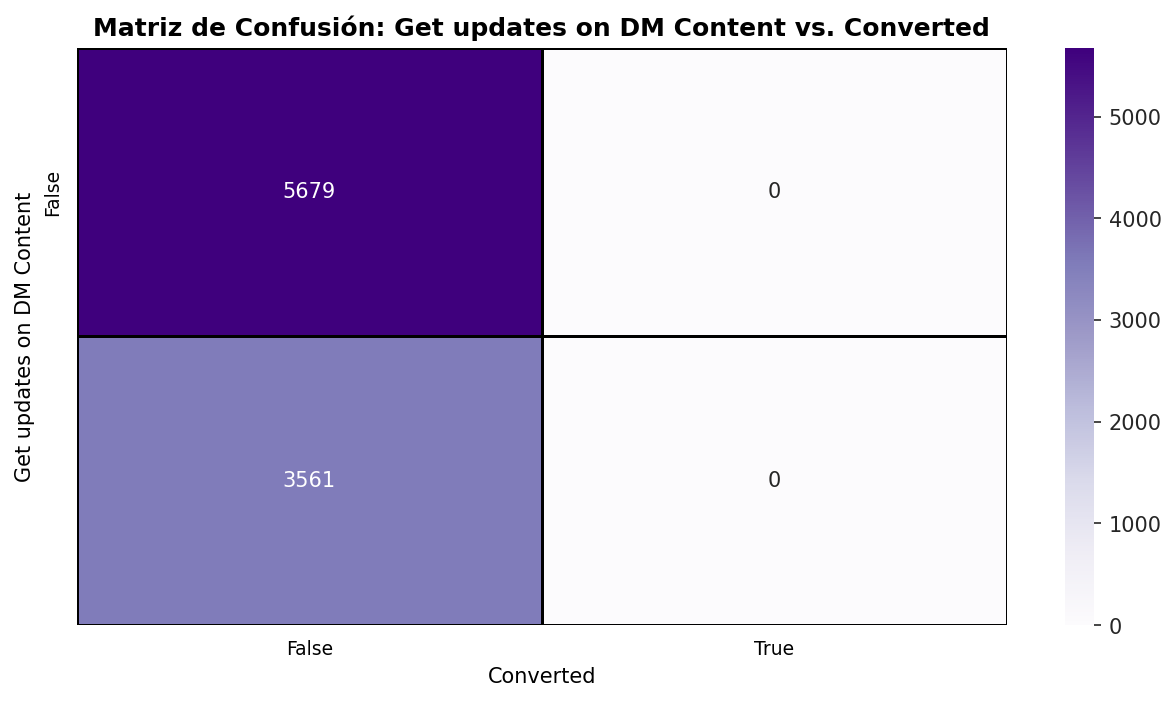

In [ ]:
# Matriz de Confusión de 'Get updates on DM Content' vs. 'Converted'
matriz_de_confusion('Get updates on DM Content')

Curiosamente, ningún prospecto mostró interés en recibir actualizaciones sobre contenido de Marketing Directo (DM).
Esto sugiere que este tipo de contenido no es relevante para la audiencia objetivo.

Dado que tanto los prospectos convertidos como los no convertidos ignoraron esta opción,
invertir recursos en esta estrategia podría no ser eficiente.

📌 Posible acción: En lugar de insistir con DM, podríamos analizar qué otros canales o contenidos
generan más interacción y centrarnos en optimizar esas estrategias.

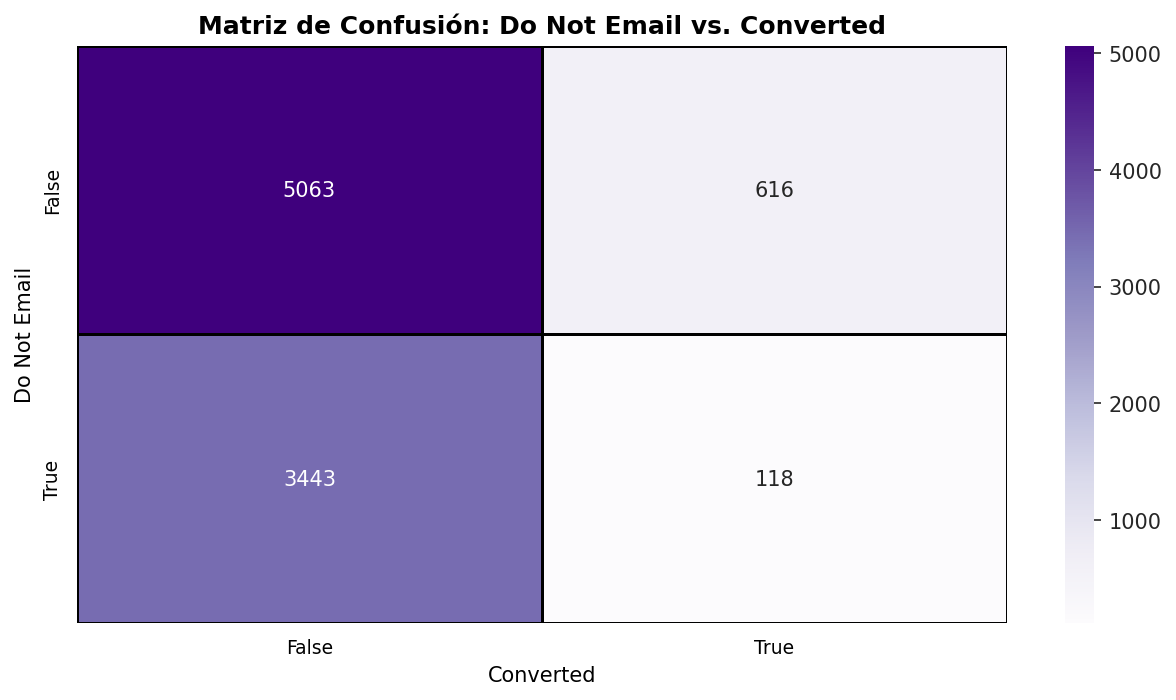

In [ ]:
# Matriz de Confusión de 'Do Not Email' vs. 'Converted'
matriz_de_confusion('Do Not Email')

📬 **Preferencias de Contacto y Conversión**  

🔹 **Correo Electrónico**  
La gran mayoría de los prospectos están abiertos a recibir correos electrónicos, lo que le da al equipo de ventas
una vía efectiva para contactarlos. Sin embargo, un pequeño porcentaje (7.94%) opta por no recibir correos electrónicos,
y su tasa de conversión es significativamente baja (16.08%). Esto indica que estos prospectos ya muestran
un menor interés desde el inicio.  

📞 **Llamadas Telefónicas**  
Entre los prospectos que no bloquearon las llamadas, la tasa de conversión es del **40.47%**, lo que sugiere que
el contacto telefónico es una estrategia efectiva para cerrar inscripcione

# Análisis Exploratorio de Variables Numéricas

In [ ]:
# Definamos la función de gráfico de caja y bigote

def grafico_de_caja(independiente, dependiente='Converted'):
    plt.figure(figsize=(10, 5), dpi=150)


    df[dependiente] = df[dependiente].astype(int)


    colores = {0: "#7B68EE", 1: "#4B0082"}

    sns.boxplot(
        x=df[dependiente],
        y=df[independiente],
        data=df,
        hue=df[dependiente],
        palette=colores
    )

    plt.title(f"Gráfico de Caja de {independiente} por {dependiente}", fontsize=12, color="black")
    plt.xlabel(dependiente, fontsize=10, color="black")
    plt.ylabel(independiente, fontsize=10, color="black")
    plt.legend(title=dependiente,loc="upper right")

    plt.show()

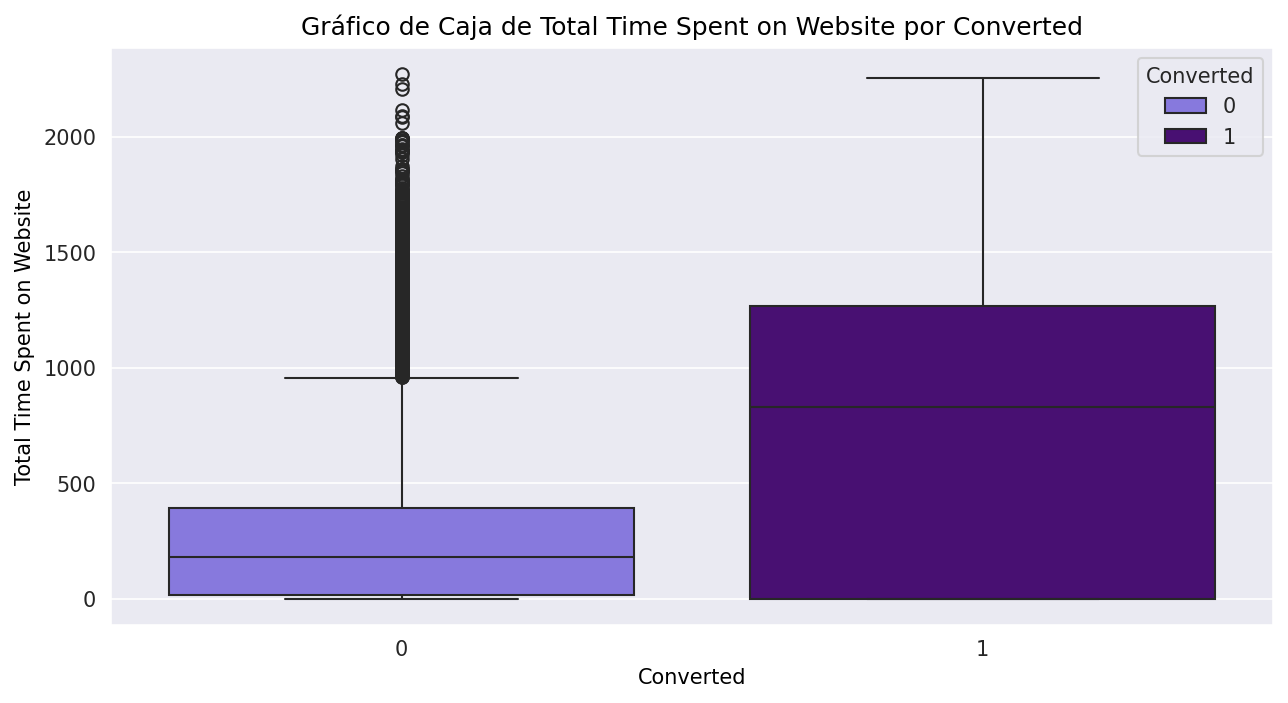

In [ ]:
# Gráfico de Caja de 'Total Time Spent on Website'
grafico_de_caja('Total Time Spent on Website')

📊 Los prospectos que se convierten pasan **mucho más tiempo** en el sitio web en comparación con los que no se convierten.  
   - Su **Rango Intercuartílico (IQR)** es significativamente mayor.

🎯 **Estrategia de Conversión:**  
   - **Incentivar** a los prospectos a permanecer más tiempo en el sitio podría **aumentar la tasa de conversión**.  
   - 💡 Un enfoque interesante sería **analizar a los leads** que pasaron un tiempo considerable en la web pero **no compraron**.  
     - Esto sugiere que están interesados, pero quizás necesiten un **impulso extra** para cerrar la venta.  


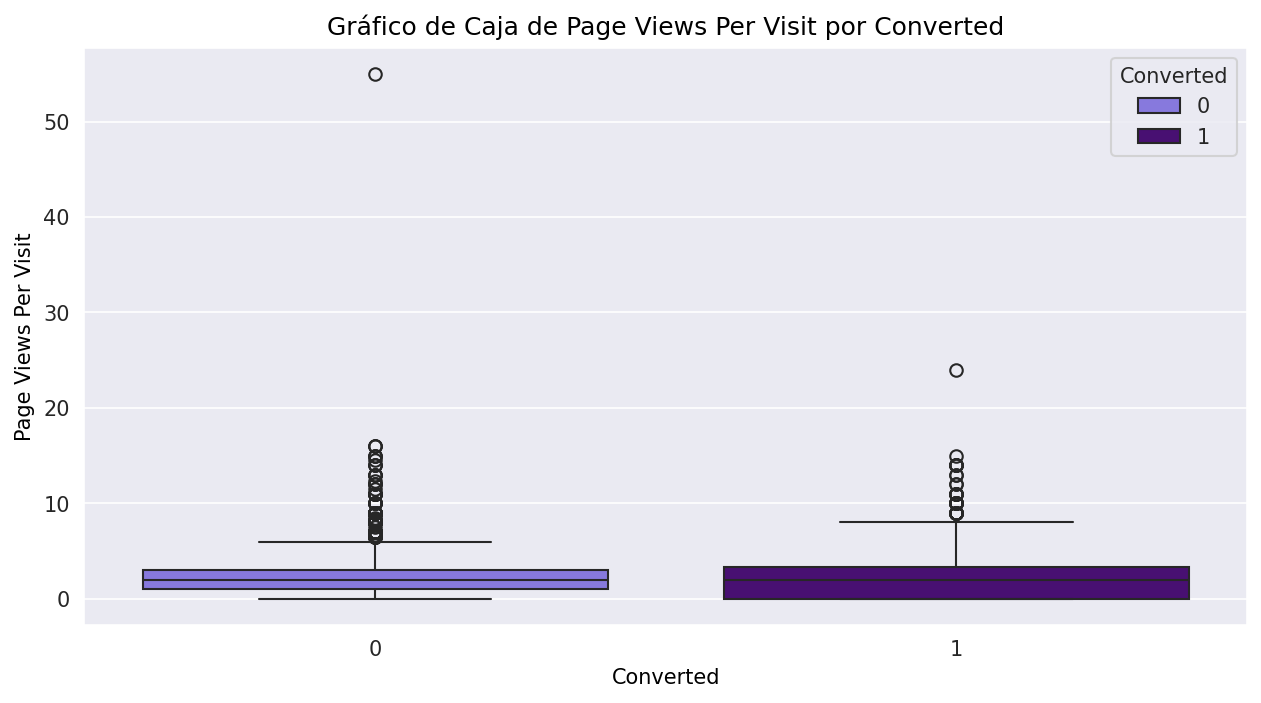

In [ ]:
# Gráfico de Caja de 'Page Views Per Visit'
grafico_de_caja('Page Views Per Visit')

📊 **Hallazgos clave:**  
   - Todas las oportunidades de venta **ven un número similar de páginas por visita en promedio**, sin importar si se convierten o no.  
   - Sin embargo, el **Rango Intercuartílico (IQR) es mayor** para los prospectos que se convierten.  

❗ **Curiosidad en los datos:**  
   - Un grupo significativo de oportunidades convertidas tiene **0 vistas de página por visita en promedio**.  
   - 🔎 El caso extremo de un usuario con **55 páginas por visita** podría no ser un prospecto real.  
     - 📌 Posibles explicaciones:  
       - **Un competidor analizando la web**.  
       - **Un miembro del equipo revisando el sitio internamente**.

In [ ]:
# Gráfico de Caja de 'TotalVisits'

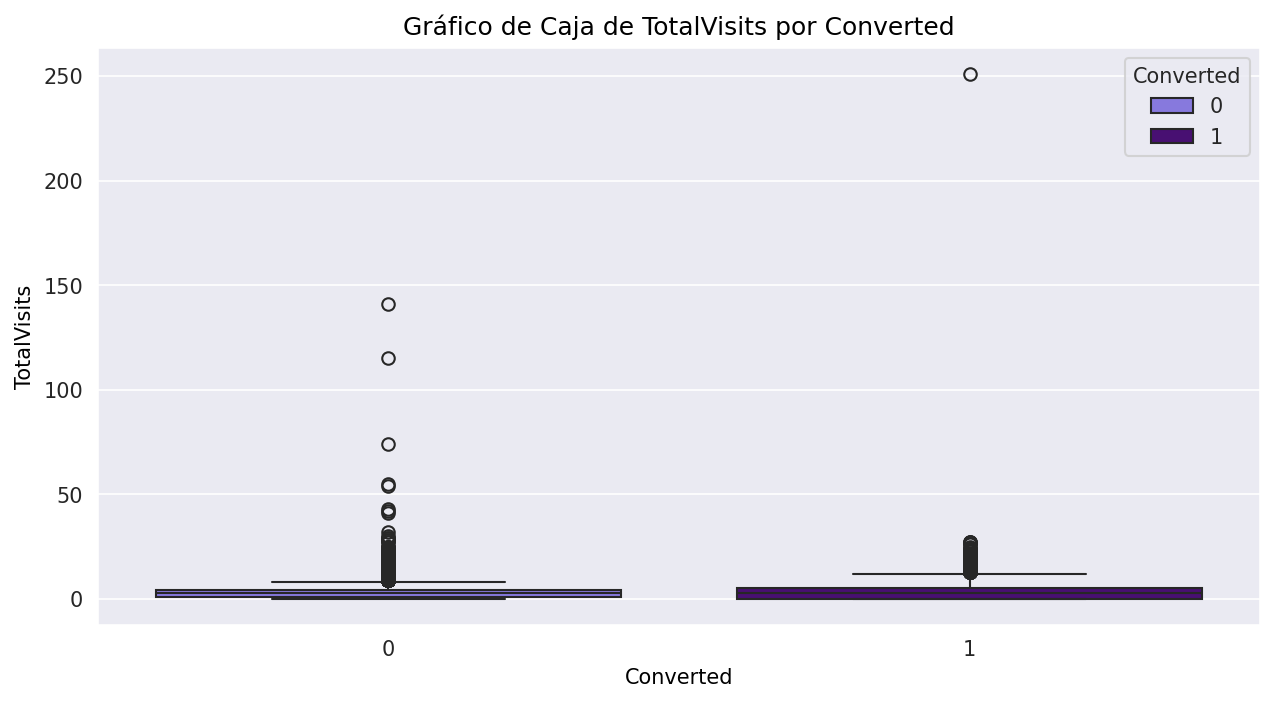

In [ ]:
# Gráfico de Caja de 'TotalVisits'
grafico_de_caja('TotalVisits')

In [ ]:
# No es posible interpretarlo por la dispersión de los outliers. Removamos los leads con mas de 30 Visitas al sitio web

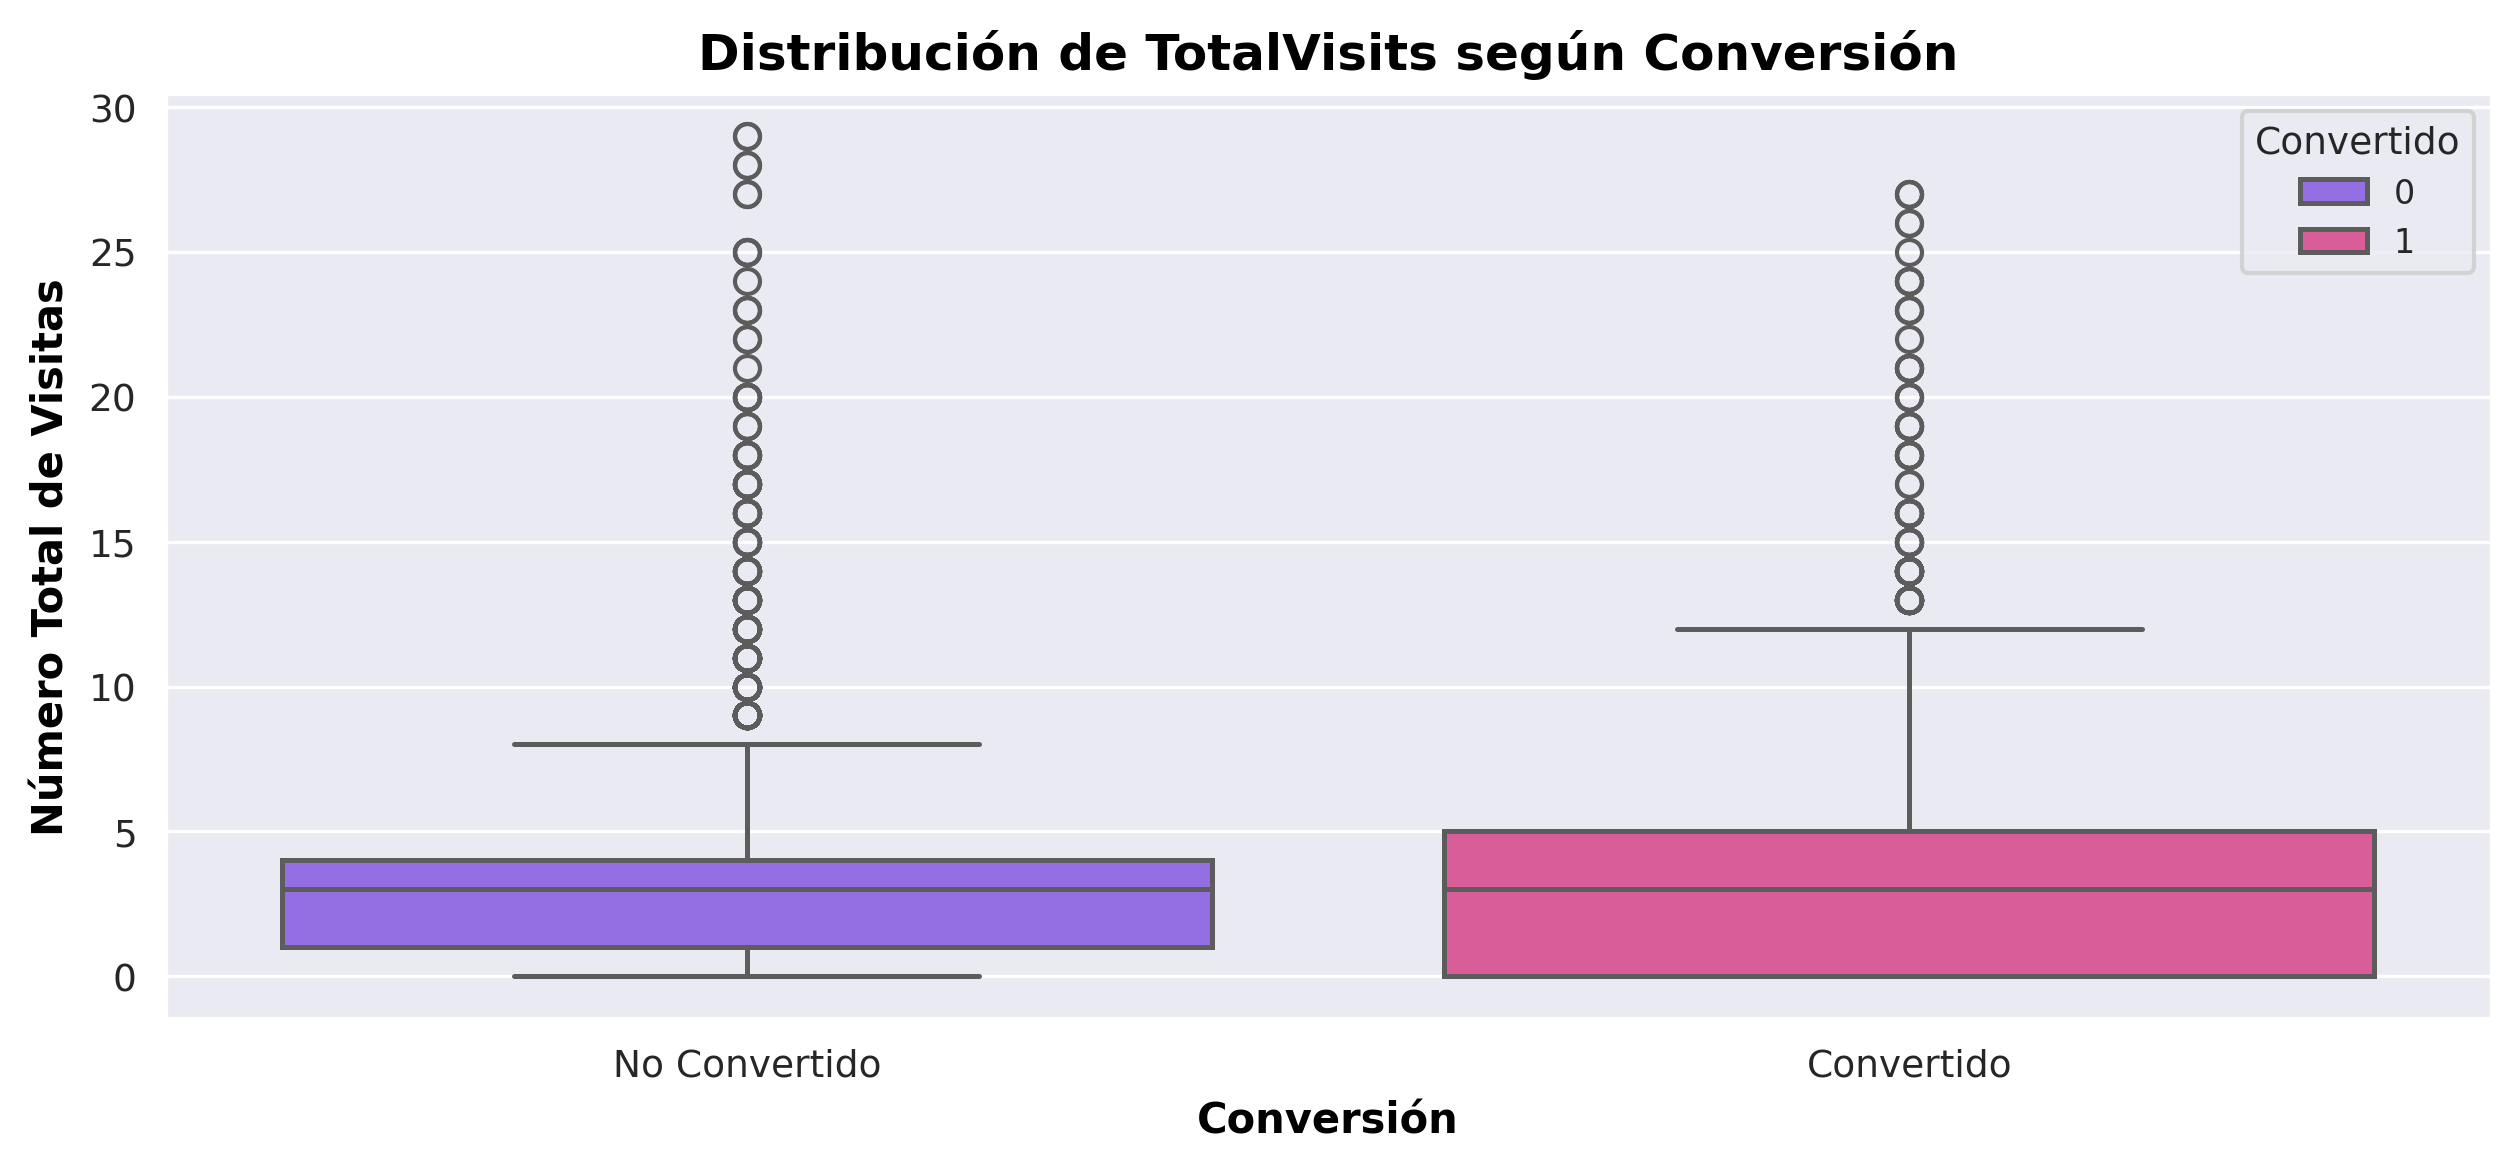

In [ ]:
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(
    data=df[df['TotalVisits'] < 30],
    x='Converted',
    y='TotalVisits',
    hue='Converted',
    palette={0: "#8B5CF6", 1: "#EC4899"},  # Morado oscuro para No, rosa para Sí
    linewidth=1.2
)

plt.title("Distribución de TotalVisits según Conversión", fontsize=12, fontweight='bold', color="black")
plt.xlabel("Conversión", fontsize=10, fontweight='bold', color="black")
plt.ylabel("Número Total de Visitas", fontsize=10, fontweight='bold', color="black")
plt.xticks(ticks=[0, 1], labels=["No Convertido", "Convertido"], fontsize=9)
plt.yticks(fontsize=9)
plt.legend(title="Convertido", title_fontsize=9, fontsize=8)
plt.show()


Además de visitar el sitio web con más frecuencia, los leads de venta que se convierten parecen mostrar una mayor dispersión y Rango Intercuartílico (IQR) que los leads que no se convierten.

# Desarrollo del Modelo de Regresión Logística

📌 **Desarrollo del Modelo de Regresión Logística**

En esta etapa, construiremos un modelo de regresión logística para predecir la conversión de prospectos.

🔹 **Paso 1: Identificar las variables**
    - La variable dependiente es `Converted` (1: convertido, 0: no convertido).
    - Las variables independientes incluyen todas las demás columnas del DataFrame.

🔹 **Paso 2: Convertir variables categóricas en dummies**
    - Como la regresión logística solo trabaja con variables numéricas, transformaremos las variables categóricas en variables dummies.

🔹 **Paso 3: Dividir los datos en entrenamiento y prueba**
    - Usaremos una proporción de 80%-20% para entrenar y evaluar el modelo.

🔹 **Paso 4: Ajustar el modelo**
    - Entrenaremos el modelo de regresión logística con los datos transformados.
    - Evaluaremos su desempeño con métricas como precisión, recall, F1-score y matriz de confusión.

🔹 **Paso 5: Interpretar los coeficientes**
    - Analizaremos cómo cada variable afecta la probabilidad de conversión.
    - Esto nos permitirá tomar decisiones estratégicas para mejorar las tasas de conversión.

📌 ¡Manos a la obra! 🚀

In [ ]:
# Botamos la variable dependiente y generamos las dummies de las categóricas
df['Converted'] = df['Converted'].astype(bool)
X = pd.get_dummies(df.drop(columns='Converted', axis=1))
X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,False,False,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660728,False,False,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660727,False,False,2.0,1532,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660719,False,False,1.0,305,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
660681,False,False,2.0,1428,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
Y = df['Converted']

Luego, dividimos nuestros datos en un conjunto de entrenamiento y un conjunto de prueba (el 80% de los datos se utilizarán para el conjunto de entrenamiento, mientras que el 20% restante se utilizará en el conjunto de prueba).

In [ ]:
X_entrenamiento, X_evaluacion, Y_entrenamiento, Y_evaluacion = train_test_split(X, Y, test_size = 0.2,
                                                                               random_state = 99, stratify = Y)

El parámetro stratify = Y en train_test_split asegura que la proporción de clases en los conjuntos de entrenamiento y evaluación sea la misma que la proporción de clases en el conjunto de datos original Y. Esto es crucial para mantener una distribución representativa y equilibrada de las clases, especialmente en casos de desequilibrio significativo entre ellas.

📏 **Ajuste de Escala de las Variables** 📏

El escalado de variables es un paso crucial en el modelado de clasificación, ya que los predictores numéricos pueden tener magnitudes y escalas muy diferentes. Para garantizar que el modelo funcione de manera eficiente, aplicaremos técnicas de normalización.

🔹 **Variables numéricas a escalar:**
    - `TotalVisits`
    - `Total Time Spent on Website`
    - `Page Views Per Visit`

🔹 **¿Por qué es importante?**
    - Modelos como la regresión logística pueden verse afectados si las variables tienen escalas muy distintas.
    - Técnicas que dependen de medidas de distancia (como KNN o SVM) requieren datos bien escalados para un desempeño óptimo.

🔹 **¿Qué técnica usar?**
    - Si **los datos no siguen una distribución normal**, aplicamos `MinMaxScaler()`.
      - Este método ajusta los valores dentro de un rango de 0 a 1, preservando la distribución original de los datos.
    - Si **los datos siguen una distribución normal**, usamos `StandardScaler()`.
      - Convierte los datos a una media de 0 y una desviación estándar de 1 (normalización Z).

📌 En nuestro caso, dado que las variables no siguen una distribución normal, utilizaremos **MinMaxScaler** para asegurarnos de que todas las variables numéricas estén dentro de un mismo rango y mejorar la estabilidad del modelo. 🚀

In [ ]:
# Escalado de variables utilizando MixMaxScaler
var_escalar = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [ ]:
# Creamos la instancia MinMaxScaler
escalar = MinMaxScaler()

In [ ]:
# Transformamos las variables con MixMaxScaler
# Primero la base de entrenamiento
X_entrenamiento[var_escalar] = escalar.fit_transform(X_entrenamiento[var_escalar])
X_entrenamiento.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
627877,False,False,0.015936,0.672975,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
585642,False,False,0.015936,0.079225,0.036364,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
617566,False,False,0.023904,0.453345,0.054545,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
655639,False,False,0.015936,0.001320,0.072727,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
593227,False,False,0.003984,0.210387,0.018182,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Y ahora la base de evaluación:
En el escalado de datos, utilizamos fit_transform en el conjunto de entrenamiento para calcular los parámetros de escalado (como mínimo y máximo) y luego aplicar la transformación. En cambio, para el conjunto de evaluación, solo usamos transform para aplicar los mismos parámetros ya calculados, asegurando así la coherencia y evitando el sesgo en nuestro modelo.

In [ ]:
X_evaluacion[var_escalar] = escalar.transform(X_evaluacion[var_escalar])
X_evaluacion.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
591899,False,False,0.015936,0.173856,0.024182,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
604007,False,False,0.019920,0.412852,0.090909,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
653773,False,False,0.011952,0.111356,0.054545,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
611519,False,False,0.015936,0.699384,0.072727,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
584568,False,False,0.007968,0.014525,0.036364,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


🚀 **Escalado de Datos con MinMaxScaler: ¿Antes o Después de la División?** 🚀

📌 **Regla de oro:** Siempre dividir el conjunto de datos en entrenamiento y evaluación antes de escalar.

🔹 **¿Por qué?**  
    - Si escalamos antes de dividir, el `MinMaxScaler` utilizará toda la distribución de los datos, incluyendo el conjunto de prueba.  
    - Esto genera **fuga de datos**, es decir, el modelo "ve" información del conjunto de evaluación antes de la prueba.  
    - Como resultado, la evaluación del modelo será **optimista e irreal**, lo que puede llevar a errores en la validación.

🔹 **Mejor práctica:**  
    - Primero, dividir los datos en entrenamiento y prueba (`train_test_split`).
    - Luego, aplicar `MinMaxScaler` solo sobre el conjunto de entrenamiento.
    - Finalmente, usar el mismo escalador para transformar el conjunto de prueba.

📌 **Beneficio clave:**  
Este enfoque asegura que la evaluación del modelo refleje su verdadero desempeño en datos no vistos, evitando sesgos en la validación. ✅  

In [ ]:
# Creamos el modelo de regresión logística
modelo_rl = LogisticRegression()

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
modelo_rl = LogisticRegression(solver='saga', max_iter=500)
modelo_rl.fit(X_entrenamiento, Y_entrenamiento)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [ ]:
# Predecimos las probabilidades en el conjunto de evaluación
Y_prediccion = modelo_rl.predict_proba(X_evaluacion)[:, 1]


📌 Interpretación de modelo_rl.predict_proba(X_evaluacion)[:, 1]

La función predict_proba de un modelo de regresión logística devuelve un array con dos columnas:
- La primera columna representa la probabilidad de que la observación pertenezca a la clase 0.
- La segunda columna representa la probabilidad de que la observación pertenezca a la clase 1.

Al seleccionar [:, 1], obtenemos únicamente la probabilidad de que cada observación pertenezca a la clase positiva ('Converted').
Esto nos permite evaluar el nivel de confianza del modelo en sus predicciones y ajustar umbrales de decisión personalizados.

In [ ]:
Y_prediccion

array([0.35853212, 0.90530864, 0.07131187, ..., 0.12378772, 0.98442881,
       0.05309045])

# AUC y ROC

🔍 **Curva ROC y Función roc_curve**

La función `roc_curve` de la biblioteca `sklearn.metrics` genera múltiples puntos de corte (umbrales) y calcula dos métricas fundamentales para cada uno de ellos:
  
   - **Tasa de Verdaderos Positivos (TPR)**: La proporción de casos positivos correctamente identificados.
   - **Tasa de Falsos Positivos (FPR)**: La proporción de casos negativos que fueron incorrectamente clasificados como positivos.

La curva ROC es una representación gráfica que traza TPR versus FPR para todos estos umbrales, ofreciendo una visión integral de la capacidad del modelo para distinguir entre las clases a través de diferentes puntos de corte.

Al ejecutar `roc_curve` utilizando las etiquetas verdaderas y las probabilidades de predicción, se generan tres arrays:
  
   - **fpr**: Los valores de la Tasa de Falsos Positivos.
   - **tpr**: Los valores de la Tasa de Verdaderos Positivos.
   - **puntos_de_corte**: Los umbrales de decisión correspondientes.

Estos arrays son esenciales para calcular el **AUC (Área Bajo la Curva)**, que resume en un solo número la capacidad discriminativa del modelo.

¡Esta es la base para evaluar y ajustar nuestro modelo de manera efectiva!

In [ ]:
fpr, tpr, puntos_de_corte= roc_curve(Y_evaluacion, Y_prediccion)

# Calcular el área bajo la curva (AUC)
AUC (Área Bajo la Curva): Es el área bajo la curva ROC. Este valor cuantifica qué tan bueno es el modelo para distinguir entre las clases. Un AUC de 1 significa un modelo perfecto, mientras que un AUC de 0.5 significa un modelo no mejor que un lanzamiento de moneda al azar.

In [ ]:
auc_rl = auc(fpr, tpr)
auc_rl

0.921377368847919

La **Curva ROC** es una herramienta gráfica que permite evaluar el rendimiento de un modelo de clasificación en distintos umbrales de decisión. Se construye trazando dos métricas clave:

   - **Tasa de Verdaderos Positivos (Sensibilidad o Recall)**: Proporción de casos positivos correctamente identificados.
   - **Tasa de Falsos Positivos (1 - Especificidad)**: Proporción de casos negativos clasificados erróneamente como positivos.

🔹 **¿Cómo funciona la Curva ROC?**  
La idea central es analizar cómo varían estas tasas cuando ajustamos el umbral de clasificación. Si el umbral es muy bajo, el modelo predice más positivos (mayor sensibilidad, pero más falsos positivos). Si es alto, el modelo se vuelve más estricto (menos falsos positivos, pero también menos verdaderos positivos).  

🔹 **¿Por qué es útil?**  
La Curva ROC permite visualizar el **trade-off** entre sensibilidad y especificidad, ayudando a seleccionar el umbral más adecuado según el problema. Además, el **Área Bajo la Curva (AUC)** proporciona una métrica resumen del desempeño general del modelo:

   - **AUC cercano a 1**: Modelo con alta capacidad de discriminación.
   - **AUC alrededor de 0.5**: Modelo que no distingue mejor que el azar.
   - **AUC bajo**: Modelo con pobre desempeño.

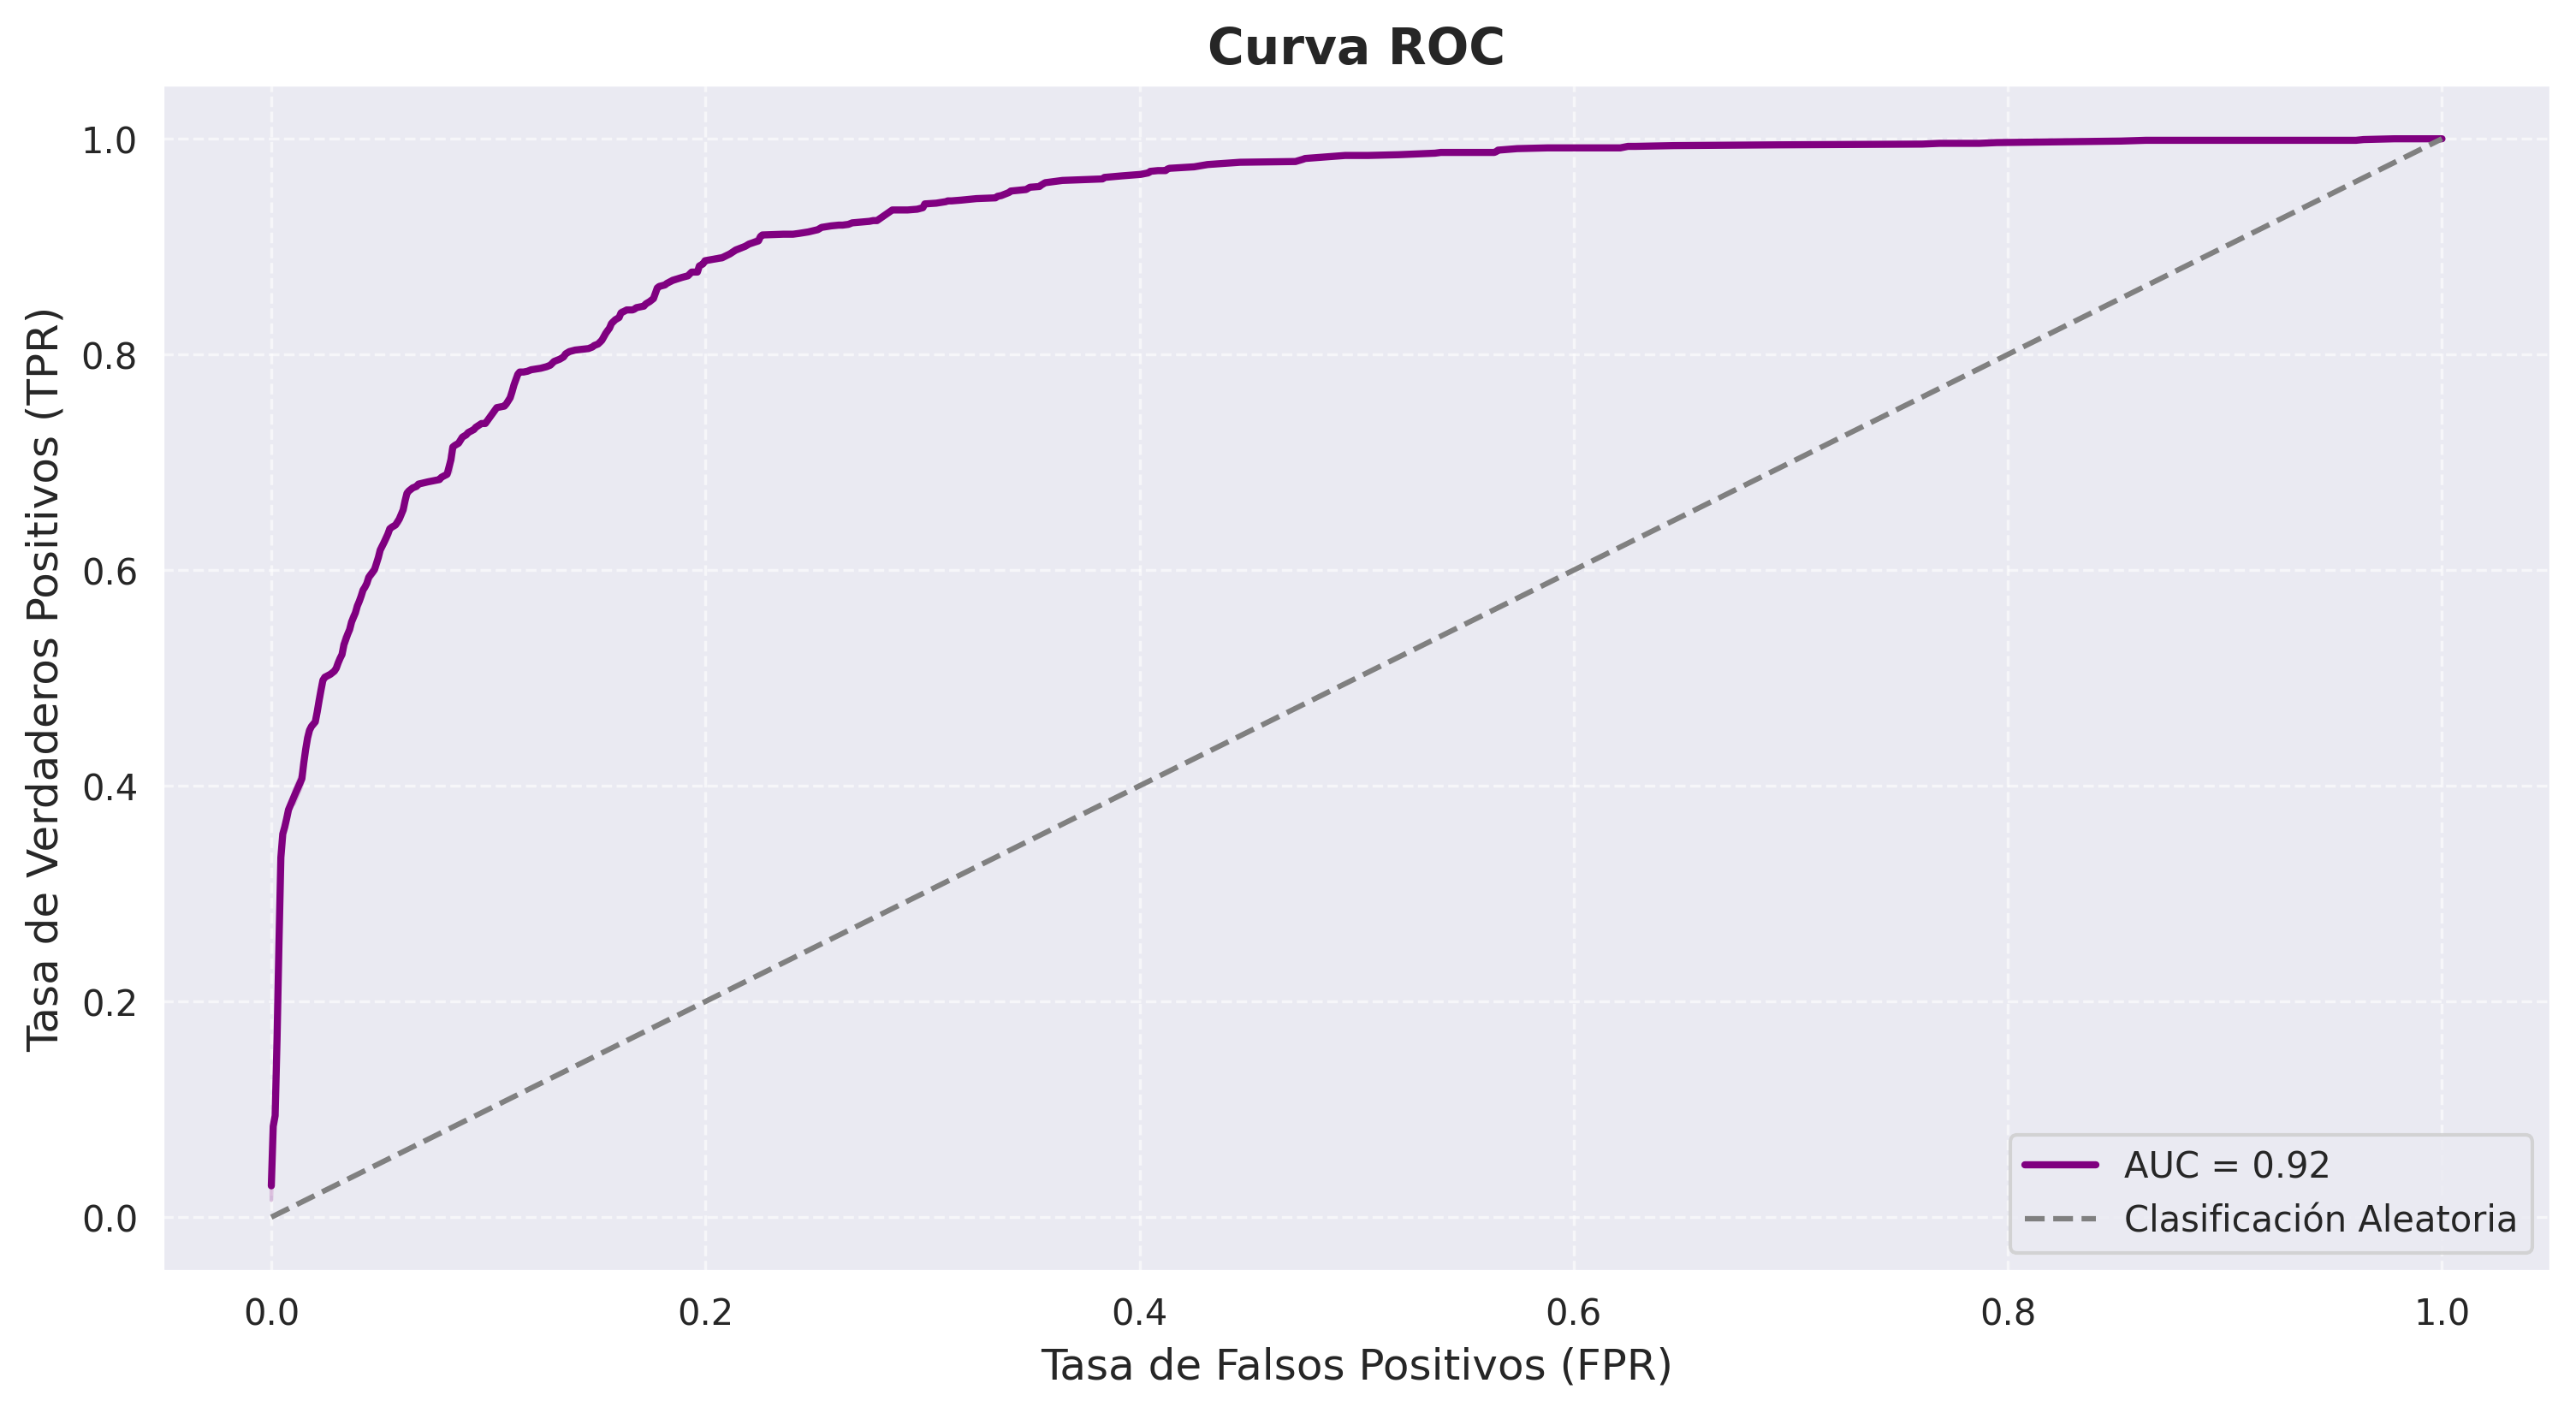

In [ ]:
#Graficamos nuestra curva ROC
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x=fpr, y=tpr, label=f'AUC = {auc_rl:.2f}', color='purple', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label="Clasificación Aleatoria")
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

🔍 **Interpretación del AUC (Área Bajo la Curva ROC)**

✅ El modelo ha obtenido un **AUC de 0.92**, lo que indica un **alto rendimiento** en la clasificación.  
📊 Esto significa que hay un **92% de probabilidad** de que el modelo asigne una puntuación más alta  
a una observación positiva en comparación con una negativa.  

💡 **¿Por qué es importante el AUC?**  
- Un AUC alto refleja **una buena capacidad de discriminación** entre clases.  
- Un valor de **0.5** indica que el modelo no es mejor que una clasificación aleatoria.  
- Un valor cercano a **1** sugiere un modelo casi perfecto en la diferenciación de clases.  

⚠️ **Consideraciones adicionales**  
Aunque un AUC elevado es una señal positiva, **no debe ser el único criterio de evaluación**.  
Se recomienda analizar otros aspectos como:  
- **Interpretabilidad:** ¿Es el modelo fácil de entender?  
- **Complejidad:** ¿El modelo es eficiente en términos de costo computacional?  
- **Objetivos del negocio:** ¿El modelo satisface las necesidades del problema real?  

📝 **Conclusión**  
Este AUC de **0.92** es **alentador** y demuestra una excelente capacidad de clasificación.  
Sin embargo, para seleccionar el mejor modelo, es fundamental **comparar su desempeño**  
con otros modelos y evaluar métricas adicionales según el contexto del problema.

🔍 **Estableciendo el Punto de Corte en la Regresión Logística**  

En modelos de clasificación como la **Regresión Logística**, la salida es una **probabilidad**  
de pertenecer a la clase positiva (1). Sin embargo, para tomar decisiones, necesitamos definir  
un **punto de corte** (threshold) que determine cuándo clasificar una observación como 1 o 0.  

📌 **Concepto clave**  
- Si la probabilidad predicha es **mayor o igual al punto de corte**, clasificamos la observación como **1**.  
- Si la probabilidad predicha es **menor al punto de corte**, la clasificamos como **0**.  
- El punto de corte por defecto suele ser **0.5**, pero puede ajustarse según la necesidad del problema.  

🎯 **Importancia del Punto de Corte**  
- **Umbrales bajos** aumentan la sensibilidad (detecta más positivos) pero pueden incrementar falsos positivos.  
- **Umbrales altos** aumentan la especificidad (menos falsos positivos) pero pueden perder verdaderos positivos.  

💡 **Estrategia**  
El punto de corte óptimo se elige en función de la métrica que se quiera priorizar,  
como **precisión, recall, F1-score o maximización del AUC-ROC**.

In [ ]:
# Definimos los costos y beneficios
COSTO_FP = 50
BENEFICIO_TP = 100

In [ ]:
#Lista donde almacenaremos
utilidades = []

In [ ]:
# Evaluamos la utilidad en función de distintos puntos de corte
for puntodecorte in puntos_de_corte:

    predicciones = (Y_prediccion >= puntodecorte).astype(int)


    vp = np.sum((predicciones == 1) & (Y_evaluacion == 1))
    fp = np.sum((predicciones == 1) & (Y_evaluacion == 0))


    utilidad = (vp * BENEFICIO_TP) - (fp * COSTO_FP)
    utilidades.append(utilidad)

In [ ]:
# Determinamos el punto de corte óptimo
indice_max_utilidad = np.argmax(utilidades)
punto_de_corte_optimo = puntos_de_corte[indice_max_utilidad]
utilidad_maxima = utilidades[indice_max_utilidad]
print(f"📌 Punto de corte óptimo: {punto_de_corte_optimo:.3f}")
print(f"💰 Utilidad máxima alcanzada: {utilidad_maxima}")

📌 Punto de corte óptimo: 0.268
💰 Utilidad máxima alcanzada: 52050


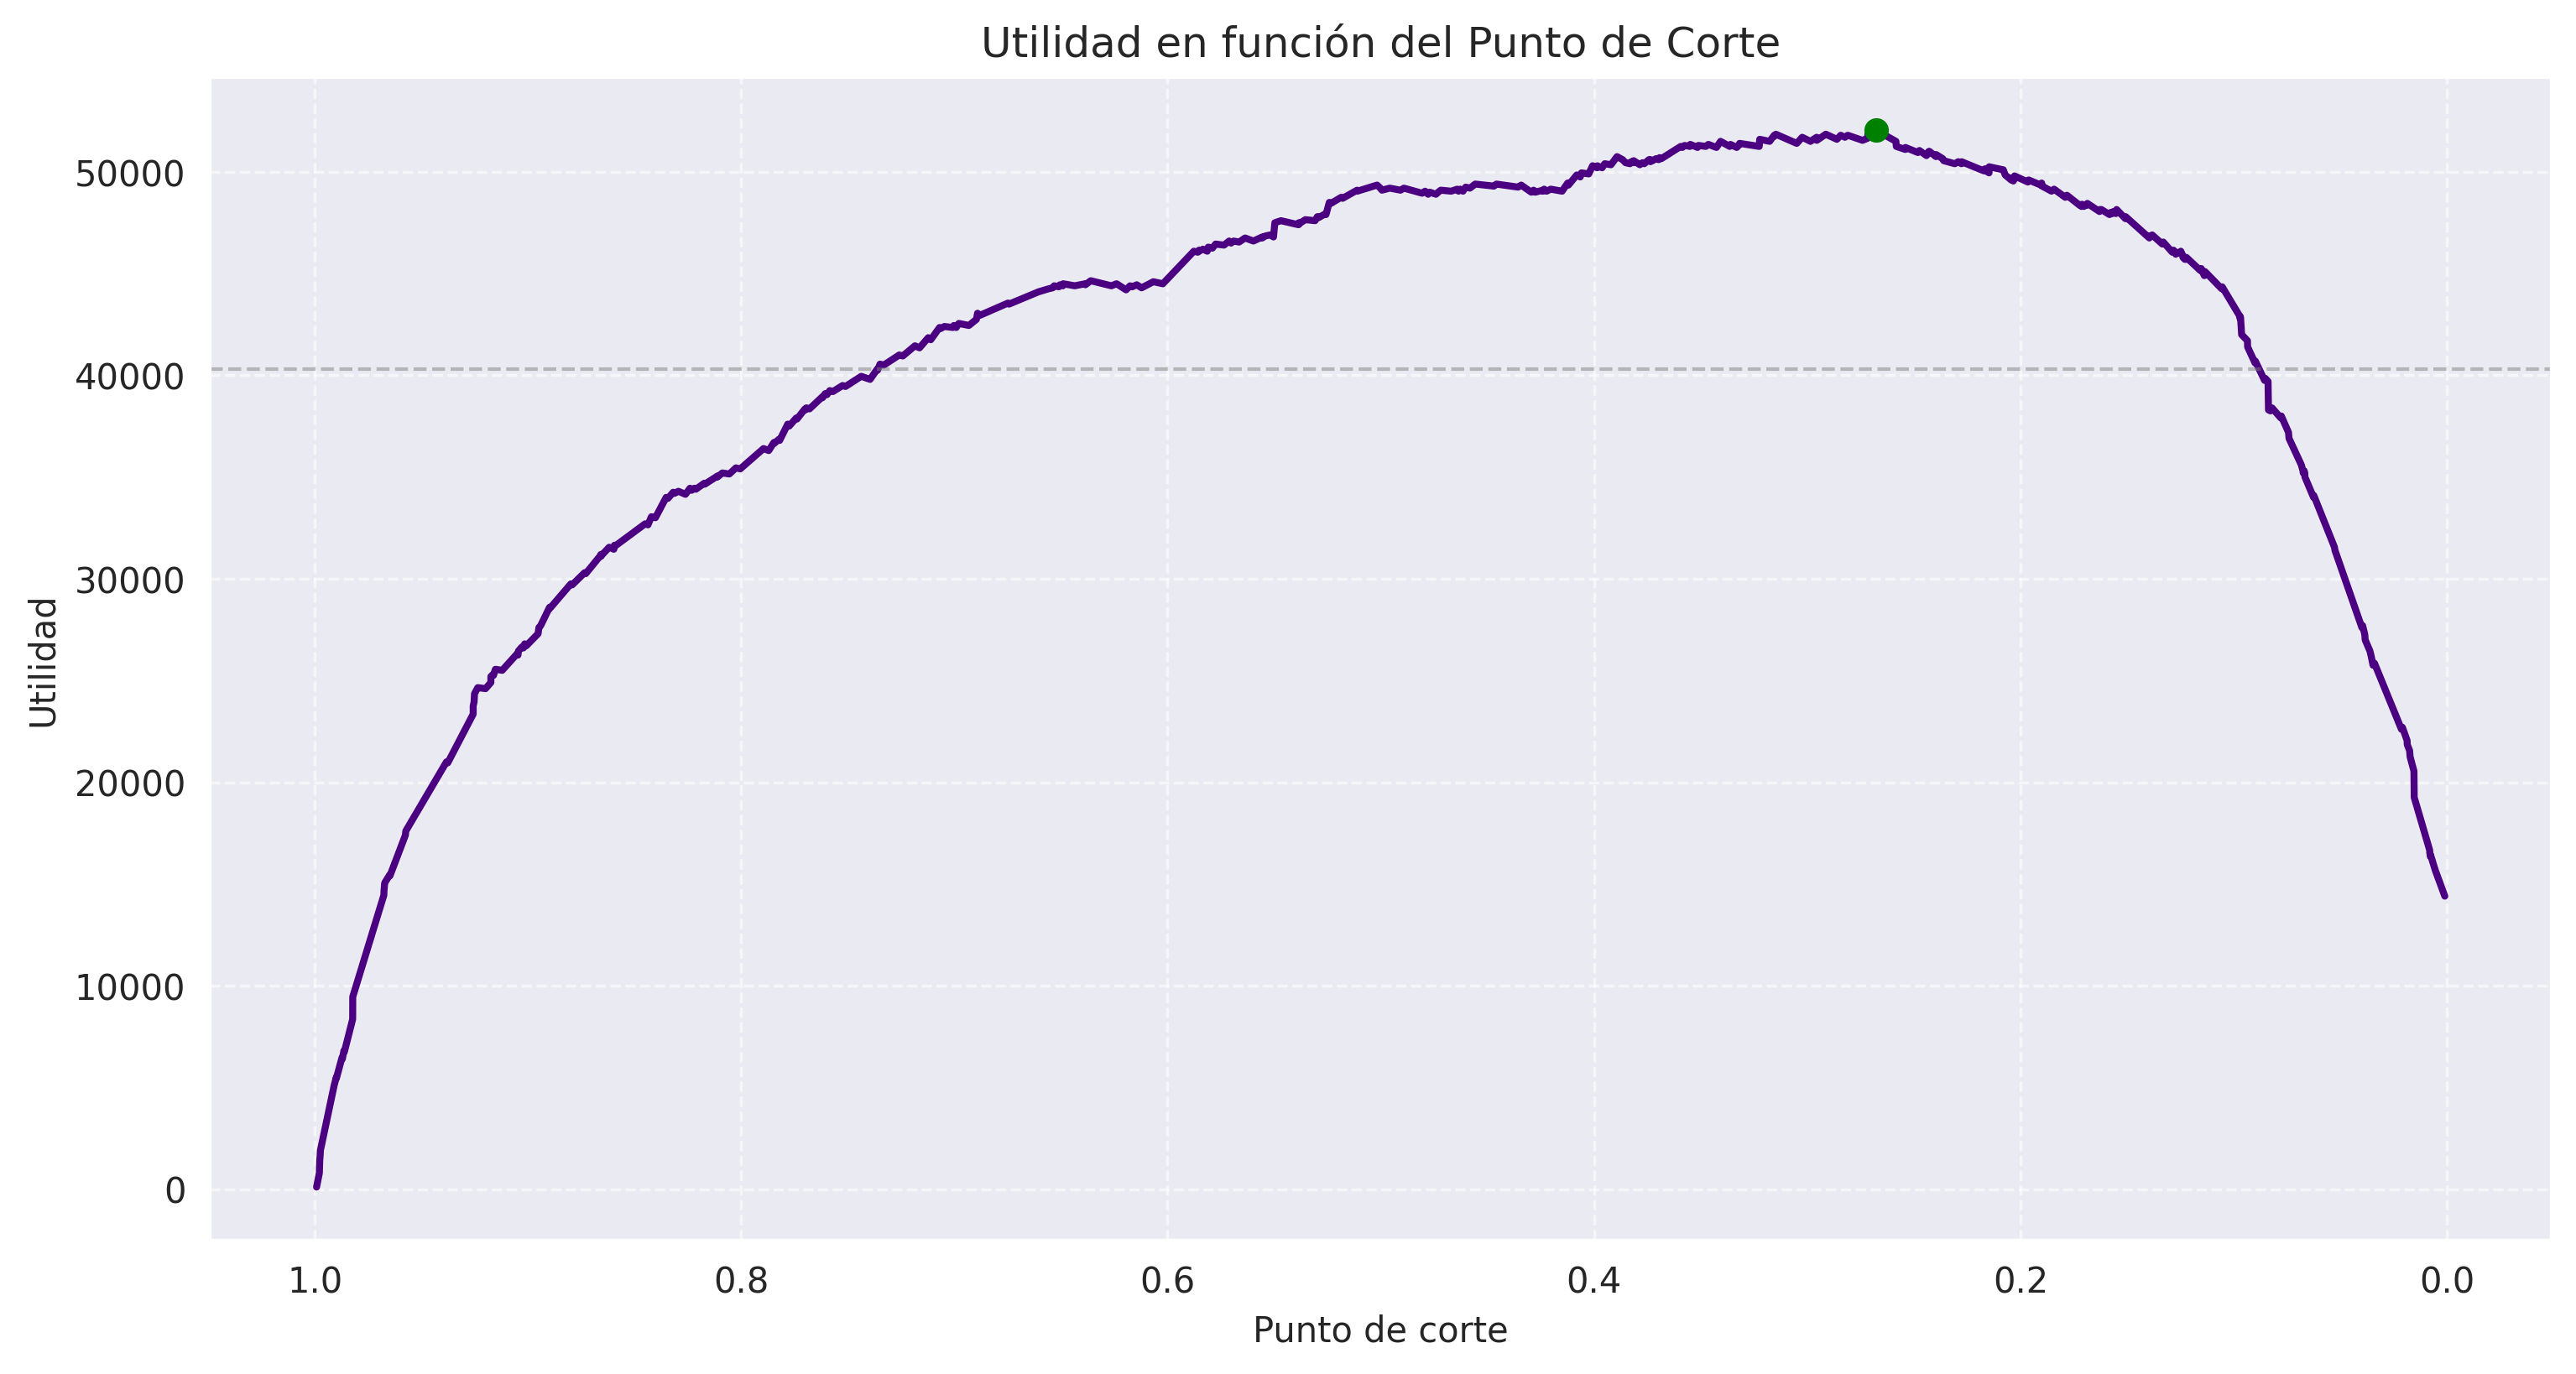

In [ ]:
# Visualización de la utilidad en función del punto de corte
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(puntos_de_corte, utilidades, color='#4B0082', linewidth=2)
plt.scatter(punto_de_corte_optimo, utilidad_maxima, color='green', zorder=4)
plt.axhline(y=np.mean(utilidades), color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Punto de corte')
plt.ylabel('Utilidad')
plt.title('Utilidad en función del Punto de Corte')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_xaxis()
plt.legend([], [], frameon=False)

plt.show()



# Interpretacion
📌 Punto de corte óptimo: 0.268
   - Si la probabilidad de conversión estimada es >= 0.268, clasificamos como "convertido" (1).
   - Si es menor, clasificamos como "no convertido" (0).

💰 Utilidad máxima alcanzada: 52,050
   - Este umbral maximiza la utilidad esperada, considerando beneficios y costos.
   - Elegir otro punto podría mejorar otras métricas (precisión, recall) pero impactaría la utilidad.

📊 Consideraciones:
   - Un umbral más alto reduciría falsos positivos (FP) pero también verdaderos positivos (TP).
   - Un umbral más bajo aumentaría TP pero con más FP y mayor costo.
   - La elección del umbral depende del contexto del negocio y la tolerancia al riesgo.

# Úlitmos paso a realizar

In [ ]:
# Evaluacion del modelo en datos prueba
punto_de_corte_optimo = 0.268
predicciones_finales = (Y_prediccion >= punto_de_corte_optimo).astype(int)
print(classification_report(Y_evaluacion, predicciones_finales))

              precision    recall  f1-score   support

       False       0.93      0.77      0.85      1136
        True       0.72      0.91      0.80       712

    accuracy                           0.83      1848
   macro avg       0.82      0.84      0.82      1848
weighted avg       0.85      0.83      0.83      1848



📌 Reporte de Clasificación:

- Precisión (Precision):
  - Clase 'No': 93%  → Cuando el modelo dice 'No', acierta el 93% de las veces.
  - Clase 'Sí': 72%  → Cuando el modelo dice 'Sí', acierta el 72% de las veces.

- Sensibilidad / Recall:
  - Clase 'No': 77%  → El modelo identifica correctamente el 77% de los 'No'.
  - Clase 'Sí': 91%  → El modelo identifica correctamente el 91% de los 'Sí'.

- F1-score:
  - Clase 'No': 85%  → Promedio entre precisión y recall.
  - Clase 'Sí': 80%  → Equilibrio entre la precisión y la recuperación de la clase positiva.

🔹 Interpretación:
El modelo detecta bien a los clientes que convertirán (recall 91%), pero
comete errores al predecir conversiones falsas (precisión del 72%).
Se puede mejorar equilibrando recall y precisión con ajustes en el umbral de decisión.

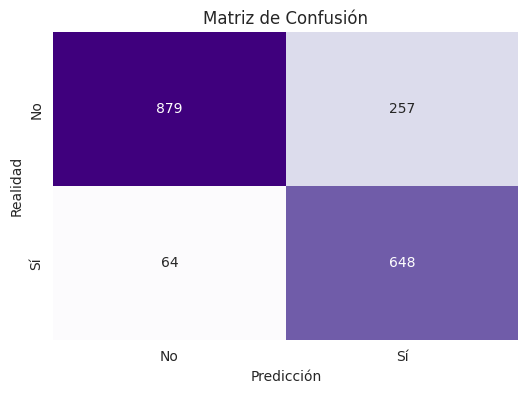

In [ ]:
# Calculamos la matriz de confusión
matriz_confusion = confusion_matrix(Y_evaluacion, predicciones_finales)
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Purples", cbar=False, xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()

# Interpretacion de la gráfica
- Verdaderos negativos (No - No): 879 casos correctamente clasificados.
- Falsos positivos (No - Sí): 257 casos mal clasificados como conversión.
- Falsos negativos (Sí - No): 64 casos de conversión mal clasificados como 'No'.
- Verdaderos positivos (Sí - Sí): 648 casos correctamente clasificados como conversión.

🔹 Interpretación:
El modelo tiene un buen desempeño identificando conversiones,
pero aún genera falsos positivos y negativos. Esto indica que podría mejorarse
ajustando el umbral de decisión o probando con otro modelo.

In [ ]:
# Extraemos coeficientes del modelo entrenado
coeficientes = modelo_rl.coef_[0]
variables = X_entrenamiento.columns
df_coeficientes = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Odds Ratio', ascending=False)

print(df_coeficientes)

                                              Variable  Coeficiente  \
3                          Total Time Spent on Website     4.477161   
39                        Lead Source_Welingak Website     1.890080   
46                    Last Activity_Approached upfront     1.200478   
144           Lead Profile_Dual Specialization Student     1.157786   
21                           Lead Origin_Lead Add Form     1.100025   
..                                                 ...          ...   
137         What is your current occupation_Unemployed    -1.320983   
140  What matters most to you in choosing a course_...    -1.457052   
20                 Lead Origin_Landing Page Submission    -1.568372   
56               Last Activity_Olark Chat Conversation    -1.649888   
148                 Lead Profile_Student of SomeSchool    -2.949730   

     Odds Ratio  
3     87.984492  
39     6.619896  
46     3.321705  
144    3.182879  
21     3.004240  
..          ...  
137    0.266873  
140

📌 Coeficientes de la Regresión Logística:

🔹 Variables que aumentan la probabilidad de conversión:
- 'Total Time Spent on Website' → Coef: 4.477 → Más tiempo en la web, más probabilidad de conversión.
- 'Lead Source_Welingak Website' → Coef: 1.889 → Leads de esta fuente convierten más.
- 'Last Activity_Approached upfront' → Coef: 1.200 → Contacto directo aumenta conversión.

🔹 Variables que reducen la probabilidad de conversión:
- 'Lead Profile_Student of SomeSchool' → Coef: -2.949 → Estudiantes de ciertas escuelas convierten menos.
- 'Last Activity_Olark Chat Conversation' → Coef: -1.650 → Menos probabilidad de conversión por chat.

🔹 Interpretación:
Los coeficientes indican qué tan fuerte es el impacto de cada variable en la conversión.
Valores positivos incrementan la conversión y valores negativos la reducen.

In [ ]:
# Ahora veremos la  proporción de clases
proporcion_clases = np.bincount(Y_evaluacion) / len(Y_evaluacion)
print(f"Proporción de clases: {proporcion_clases}")

Proporción de clases: [0.61471861 0.38528139]


- Clientes que NO convierten: 61.47%
- Clientes que SÍ convierten: 38.52%

🔹 Interpretación:
Existe un ligero desbalance en las clases, con más clientes que no convierten.
Esto puede afectar el rendimiento del modelo, ya que puede tender a favorecer la clase mayoritaria.

In [ ]:
# Ahora hallaremos la Utilidad Esperada
punto_corte_optimo = 0.268
utilidad_maxima = 52050
proporcion_clases = np.array([0.6147, 0.3853])
utilidad_esperada = utilidad_maxima * np.dot(proporcion_clases, [1, 1])
print(f"📌 Utilidad esperada: {utilidad_esperada:.2f}")

📌 Utilidad esperada: 52050.00


# 📌 Conclusiones finales del análisis de Regresión Logística 📊
1️⃣ **Precisión general del modelo**: Logramos una precisión del 83%, indicando un buen desempeño en la clasificación.  
2️⃣ **Balance entre clases**: La proporción de clases es de aproximadamente 61.47% (No convertidos) y 38.53% (Convertidos).  
3️⃣ **Matriz de confusión**:  
   - Se lograron **879 verdaderos negativos** y **648 verdaderos positivos**.  
   - Existen **257 falsos positivos** y **64 falsos negativos**, lo que implica que el modelo aún tiene margen de mejora.  
4️⃣ **Métricas clave**:  
   - **Precisión para 'Sí' (clase positiva)**: 72%  
   - **Recall para 'Sí'**: 91% (buena capacidad de capturar casos positivos).  
   - **F1-Score**: Balance de 80%, lo que muestra un modelo robusto.  
5️⃣ **Factores más influyentes**:  
   - 🔼 **Mayor impacto positivo**:  
     - **Tiempo total en el sitio web** (Odds Ratio: 87.98)  
     - **Fuente de lead: Welingak Website** (Odds Ratio: 6.61)  
   - 🔽 **Mayor impacto negativo**:  
     - **Perfil de lead: Estudiante de alguna escuela** (Odds Ratio: 0.05)  
     - **Actividad: Chat Olark** (Odds Ratio: 0.19)  
6️⃣ **Punto de corte óptimo**: 0.268, maximizando la utilidad.  
7️⃣ **Utilidad esperada**: 💰 52,050.00, lo que indica que el modelo es rentable en términos de clasificación.  

📌 **Reflexión final**:  
El modelo de regresión logística ha demostrado ser una herramienta útil para predecir conversiones con una combinación equilibrada de precisión y recall. Sin embargo, hay oportunidades de mejora, como la optimización del umbral de clasificación y la exploración de modelos más avanzados (como Random Forest o XGBoost).  